# Install MMSegmentation

In [ ]:
!nvidia-smi # Tesla P100이 출력되지 않으면 "런타임 초기화"

Thu Jun  2 07:27:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.11.0+cu113 True


In [ ]:
# Install MMCV
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     |████████████████████████████████| 46.4 MB 17.8 MB/s 
     |████████████████████████████████| 190 kB 9.2 MB/s 


In [ ]:
!rm -rf mmsegmentation
!git clone https://github.com/museonghwang/mmsegmentation.git
#!git clone https://github.com/open-mmlab/mmsegmentation.git 
%cd mmsegmentation
!pip install -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 7003, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 7003 (delta 0), reused 6 (delta 0), pack-reused 6986
Receiving objects: 100% (7003/7003), 12.84 MiB | 4.32 MiB/s, done.
Resolving deltas: 100% (5180/5180), done.
/content/mmsegmentation
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmsegmentation
     |████████████████████████████████| 572 kB 6.7 MB/s 
     |████████████████████████████████| 631 kB 38.0 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654017 sha256=003aa7b4cdebfa61419818767ab231f234e7ac22c1c53ff5c6c18c9bb68a2bc8
  Stored in directory: /root/.cache/pip/wheels/89/72/98/3ebfdba1069a9a8eaaa7ae7265cfd67d63ef0197aaee2e5f9c
Successfully built imgaug
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstallin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 런타임 -> 런타임 "다시 시작" 후 아래 수행. 
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

1.11.0+cu113 True
0.24.1


# Run Inference with MMSeg trained weight

In [ ]:
%cd mmsegmentation
!mkdir checkpoints
!wget https://download.openmmlab.com/mmsegmentation/v0.5/hrnet/fcn_hr48_512x512_160k_ade20k/fcn_hr48_512x512_160k_ade20k_20200614_214407-a52fc02c.pth -P checkpoints

/content/mmsegmentation
mkdir: cannot create directory ‘checkpoints’: File exists
--2022-05-20 03:13:29--  https://download.openmmlab.com/mmsegmentation/v0.5/hrnet/fcn_hr48_512x512_160k_ade20k/fcn_hr48_512x512_160k_ade20k_20200614_214407-a52fc02c.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.254.186.233
Connecting to download.openmmlab.com (download.openmmlab.com)|47.254.186.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 264512327 (252M) [application/octet-stream]
Saving to: ‘checkpoints/fcn_hr48_512x512_160k_ade20k_20200614_214407-a52fc02c.pth.1’

fcn_hr48_512x512_16 100%[===================>] 252.26M  10.7MB/s    in 26s     

2022-05-20 03:13:57 (9.60 MB/s) - ‘checkpoints/fcn_hr48_512x512_160k_ade20k_20200614_214407-a52fc02c.pth.1’ saved [264512327/264512327]



In [ ]:
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette

In [ ]:
config_file = '/content/mmsegmentation/configs/hrnet/fcn_hr48_512x512_160k_ade20k.py'
checkpoint_file = '/content/mmsegmentation/checkpoints/fcn_hr48_512x512_160k_ade20k_20200614_214407-a52fc02c.pth'

In [ ]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


load checkpoint from local path: /content/mmsegmentation/checkpoints/fcn_hr48_512x512_160k_ade20k_20200614_214407-a52fc02c.pth


In [ ]:
# test a single image
img = '/content/mmsegmentation/demo/demo.png'
result = inference_segmentor(model, img)

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


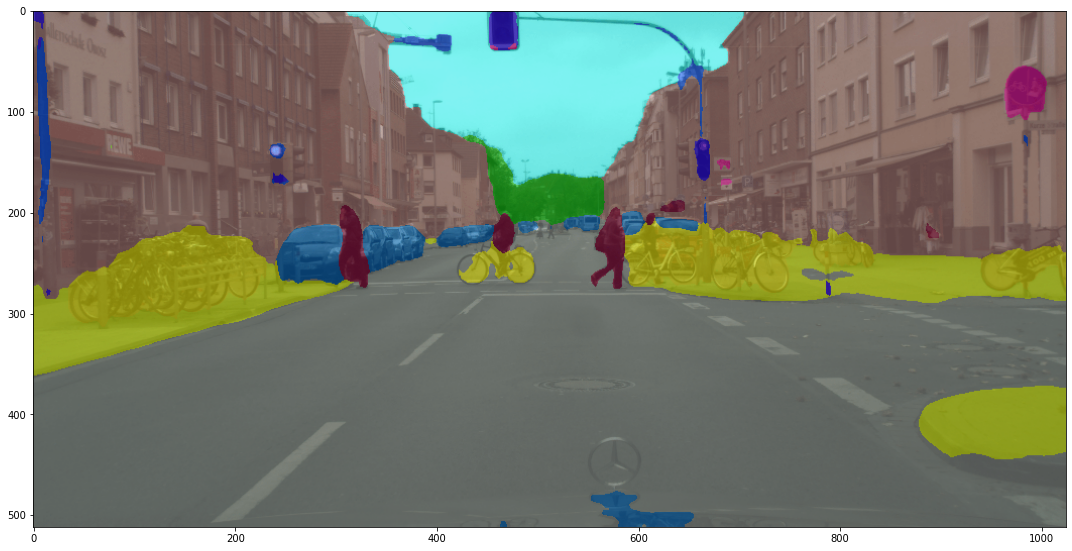

In [ ]:
# show the results
show_result_pyplot(model, img, result, get_palette('ade20k'))

## Train a semantic segmentation model on a new dataset

To train on a customized dataset, the following steps are necessary. 
1. Add a new dataset class. 
2. Create a config file accordingly. 
3. Perform training and evaluation. 

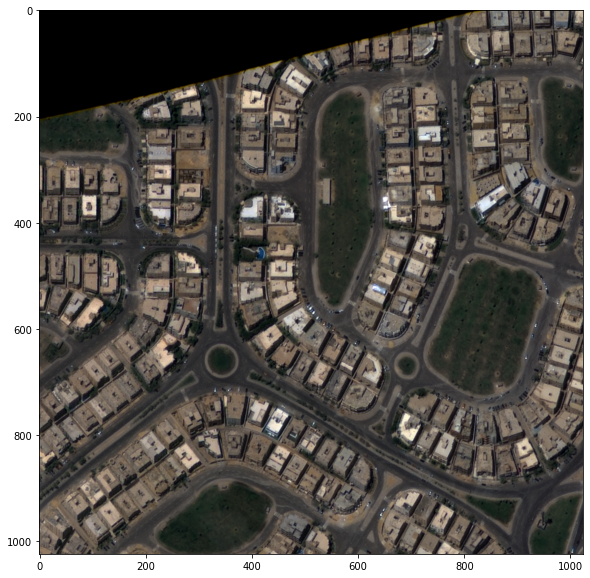

In [ ]:
# Let's take a look at the dataset
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/train/building/image/BLD00001_PS3_K3A_NIA0276.png')
plt.figure(figsize=(10, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [ ]:
import os.path as osp
import numpy as np
from PIL import Image
import cv2

# convert dataset annotation to semantic segmentation map
data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/building'
img_dir = 'image'
ann_dir = 'annotation'

# define class and plaette for better visualization
classes = ('background', 'building')
palette = [[0, 0, 0], [0, 0, 255]]

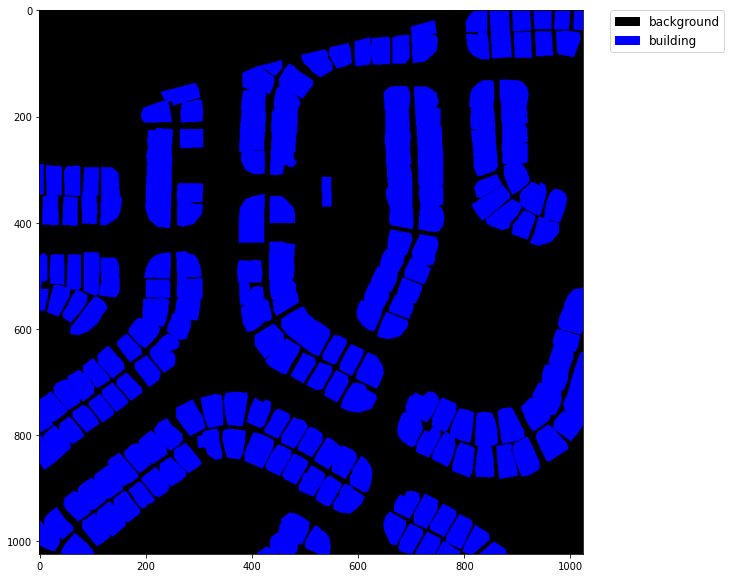

In [ ]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches

img = Image.open('/content/drive/Shareddrives/msmg/level1/dataset/train/building/annotation/BLD00001_PS3_K3A_NIA0276.png')
plt.figure(figsize=(10, 10))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., label=classes[i]) for i in range(2)]

# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize='large')

plt.show()

# Create a config file
In the next step, we need to modify the config for the training. To accelerate the process, we finetune the model from trained weights.

In [ ]:
config_file = '/content/mmsegmentation/configs/hrnet/fcn_hr48_512x512_160k_ade20k.py'
checkpoint_file = '/content/mmsegmentation/checkpoints/fcn_hr48_512x512_160k_ade20k_20200614_214407-a52fc02c.pth'
save_pth_path = '/content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint'

In [ ]:
# convert dataset annotation to semantic segmentation map
data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/building'
img_dir = 'image'
ann_dir = 'annotation'

# define class and plaette for better visualization
classes = ('background', 'building')
palette = [[0, 0, 0], [0, 0, 255]]

In [ ]:
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset

@DATASETS.register_module(force=True)
class BuildingSemanticSegmentation(CustomDataset):
    CLASSES = classes
    PALETTE = palette
    def __init__(self, split, **kwargs):
        super().__init__(img_suffix='.png', seg_map_suffix='.png', split=split, **kwargs)
        assert osp.exists(self.img_dir) and self.split is not None

In [ ]:
from mmcv import Config

cfg = Config.fromfile(config_file)

In [ ]:
from mmseg.apis import set_random_seed

# add CLASSES and PALETTE to checkpoint
cfg.checkpoint_config.meta = dict(
    CLASSES=classes,
    PALETTE=palette)

# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
#cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.backbone.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 2

# modify loss function crossentropy
cfg.model.decode_head.loss_decode= [dict(type='CrossEntropyLoss', class_weight=[0.5, 1.0], loss_name='loss_ce', loss_weight=0.8),
																		dict(type='LovaszLoss', loss_type='multi_class', classes='all', per_image=True, reduction='mean', class_weight=[0.5, 1.0], loss_name='loss_lovasz', loss_weight=0.2)]

# Modify dataset type and path
cfg.dataset_type = 'BuildingSemanticSegmentation'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 8
cfg.data.workers_per_gpu = 8

# Albumentations transforms settings
albu_train_transforms = [
    dict(
    type='OneOf',
    transforms=[
        dict(type='RandomRotate90', p=1.0)
    ], p=0.5),

    dict(
    type='OneOf',
    transforms=[
        dict(type='RandomBrightnessContrast',brightness_limit=0.1, contrast_limit=0.15, p=1.0),
        dict(type='CLAHE', clip_limit=4.0, tile_grid_size=(8, 8), always_apply=False, p=1.0),
        dict(type='HueSaturationValue', hue_shift_limit=15, sat_shift_limit=25, val_shift_limit=10, p=1.0),
    ], p=0.5)
]

# pipline
cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (512, 512)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(1024, 1024), ratio_range=(0.5, 1.5)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    # dict(
    #     type='Albu',
    #     transforms=albu_train_transforms,
    #     keymap=dict(img='image', gt_semantic_seg='mask'),
    #     update_pad_shape=True,
    #     ),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1024, 1024),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]

cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/building/'
cfg.data.train.img_dir = 'image'
cfg.data.train.ann_dir = 'annotation'
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'split/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/validation/building/'
cfg.data.val.img_dir = 'image'
cfg.data.val.ann_dir = 'annotation'
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'split/validation.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/validation/building/'
cfg.data.test.img_dir = 'image'
cfg.data.test.ann_dir = 'annotation'
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'split/validation.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = checkpoint_file

# Set up working dir to save files and logs.
cfg.work_dir = save_pth_path

cfg.runner.max_iters = 10000
cfg.log_config.interval = 10
cfg.evaluation.interval = 100
cfg.evaluation.save_best = 'mIoU'
cfg.checkpoint_config.interval = 2000

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='open-mmlab://msra/hrnetv2_w48',
    backbone=dict(
        type='HRNet',
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        extra=dict(
            stage1=dict(
                num_modules=1,
                num_branches=1,
                block='BOTTLENECK',
                num_blocks=(4, ),
                num_channels=(64, )),
            stage2=dict(
                num_modules=1,
                num_branches=2,
                block='BASIC',
                num_blocks=(4, 4),
                num_channels=(48, 96)),
            stage3=dict(
                num_modules=4,
                num_branches=3,
                block='BASIC',
                num_blocks=(4, 4, 4),
                num_channels=(48, 96, 192)),
            stage4=dict(
                num_modules=3,
                num_branches=4,
                block='BASIC',
     

# Train and Evaluation

In [ ]:
from mmseg.datasets import build_dataset
from mmseg.models import build_segmentor
from mmseg.apis import train_segmentor

# Build the dataset
datasets = [build_dataset(cfg.data.train)]

2022-05-20 03:22:15,684 - mmseg - INFO - Loaded 1238 images


In [ ]:
# Build the detector
model = build_segmentor(
    cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))

# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

/content/mmsegmentation/mmseg/models/backbones/hrnet.py:318: UserWarning: DeprecationWarning: pretrained is deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is deprecated, '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


In [ ]:
# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_segmentor(model, datasets, cfg, distributed=False, validate=True, meta=dict())

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
2022-05-20 03:22:16,436 - mmseg - INFO - Loaded 159 images
2022-05-20 03:22:16,441 - mmseg - INFO - load checkpoint from local path: /content/mmsegmentation/checkpoints/fcn_hr48_512x512_160k_ade20k_20200614_214407-a52fc02c.pth
2022-05-20 03:22:17,003 - mmseg - WARNING - The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([150, 720, 1, 1]) from checkpoint, the shape in current model is torch.Size([2, 720, 1, 1]).
size mismatch for decode_head.conv_seg.bi

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 1.4 task/s, elapsed: 110s, ETA:     0s

2022-05-20 03:26:50,751 - mmseg - INFO - per class results:
2022-05-20 03:26:50,753 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 82.55 | 84.34 |
|  building  | 65.54 | 93.99 |
+------------+-------+-------+
2022-05-20 03:26:50,754 - mmseg - INFO - Summary:
2022-05-20 03:26:50,762 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 86.9 | 74.04 | 89.16 |
+------+-------+-------+
2022-05-20 03:26:55,845 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_100.pth.
2022-05-20 03:26:55,847 - mmseg - INFO - Best mIoU is 0.7404 at 100 iter.
2022-05-20 03:26:55,851 - mmseg - INFO - Iter(val) [159]	aAcc: 0.8690, mIoU: 0.7404, mAcc: 0.8916, IoU.background: 0.8255, IoU.building: 0.6554, Acc.background: 0.8434, Acc.building: 0.9399
2022-05-20 03:27:11,566 - mmseg - INFO - Iter [110/10000]	lr: 9.903e-03, eta: 7:20:48, time: 13.100, data_time: 11.537, memory: 10902,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 03:30:12,016 - mmseg - INFO - per class results:
2022-05-20 03:30:12,018 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 87.68 | 89.74 |
|  building  | 72.79 | 93.49 |
+------------+-------+-------+
2022-05-20 03:30:12,022 - mmseg - INFO - Summary:
2022-05-20 03:30:12,025 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 90.74 | 80.24 | 91.61 |
+-------+-------+-------+
2022-05-20 03:30:12,040 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_100.pth was removed
2022-05-20 03:30:16,094 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_200.pth.
2022-05-20 03:30:16,096 - mmseg - INFO - Best mIoU is 0.8024 at 200 iter.
2022-05-20 03:30:16,101 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9074, mIoU: 0.8024, mAcc: 0.9161, IoU.background: 0.8768, IoU.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 03:33:26,350 - mmseg - INFO - per class results:
2022-05-20 03:33:26,352 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 90.49 | 94.75 |
|  building  | 75.91 | 86.96 |
+------------+-------+-------+
2022-05-20 03:33:26,353 - mmseg - INFO - Summary:
2022-05-20 03:33:26,357 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 92.68 | 83.2 | 90.85 |
+-------+------+-------+
2022-05-20 03:33:26,373 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_200.pth was removed
2022-05-20 03:33:30,504 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_300.pth.
2022-05-20 03:33:30,507 - mmseg - INFO - Best mIoU is 0.8320 at 300 iter.
2022-05-20 03:33:30,509 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9268, mIoU: 0.8320, mAcc: 0.9085, IoU.background: 0.9049, IoU.build

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 03:36:46,794 - mmseg - INFO - per class results:
2022-05-20 03:36:46,797 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 89.67 | 94.12 |
|  building  | 74.15 | 86.23 |
+------------+-------+-------+
2022-05-20 03:36:46,800 - mmseg - INFO - Summary:
2022-05-20 03:36:46,803 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 92.03 | 81.91 | 90.18 |
+-------+-------+-------+
2022-05-20 03:36:46,806 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9203, mIoU: 0.8191, mAcc: 0.9018, IoU.background: 0.8967, IoU.building: 0.7415, Acc.background: 0.9412, Acc.building: 0.8623
2022-05-20 03:37:02,369 - mmseg - INFO - Iter [410/10000]	lr: 9.635e-03, eta: 5:44:59, time: 4.867, data_time: 3.321, memory: 10902, decode.loss_ce: 0.1158, decode.loss_lovasz: 0.0491, decode.acc_seg: 91.0577, loss: 0.1649
2022-05-20 03:37:17,952 - mmseg - INFO - Iter [420/10000]	lr: 9.626e-03, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 03:40:02,743 - mmseg - INFO - per class results:
2022-05-20 03:40:02,745 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 90.77 |  95.7 |
|  building  | 75.91 | 84.94 |
+------------+-------+-------+
2022-05-20 03:40:02,749 - mmseg - INFO - Summary:
2022-05-20 03:40:02,752 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 92.85 | 83.34 | 90.32 |
+-------+-------+-------+
2022-05-20 03:40:02,763 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_300.pth was removed
2022-05-20 03:40:07,526 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_500.pth.
2022-05-20 03:40:07,527 - mmseg - INFO - Best mIoU is 0.8334 at 500 iter.
2022-05-20 03:40:07,532 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9285, mIoU: 0.8334, mAcc: 0.9032, IoU.background: 0.9077, IoU.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 03:43:16,624 - mmseg - INFO - per class results:
2022-05-20 03:43:16,626 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 90.51 | 94.38 |
|  building  | 76.27 | 88.15 |
+------------+-------+-------+
2022-05-20 03:43:16,627 - mmseg - INFO - Summary:
2022-05-20 03:43:16,635 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 92.73 | 83.39 | 91.26 |
+-------+-------+-------+
2022-05-20 03:43:16,646 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_500.pth was removed
2022-05-20 03:43:20,738 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_600.pth.
2022-05-20 03:43:20,739 - mmseg - INFO - Best mIoU is 0.8339 at 600 iter.
2022-05-20 03:43:20,747 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9273, mIoU: 0.8339, mAcc: 0.9126, IoU.background: 0.9051, IoU.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 03:46:36,763 - mmseg - INFO - per class results:
2022-05-20 03:46:36,768 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 90.14 | 93.17 |
|  building  | 76.26 |  90.7 |
+------------+-------+-------+
2022-05-20 03:46:36,770 - mmseg - INFO - Summary:
2022-05-20 03:46:36,772 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 92.51 | 83.2 | 91.93 |
+-------+------+-------+
2022-05-20 03:46:36,776 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9251, mIoU: 0.8320, mAcc: 0.9193, IoU.background: 0.9014, IoU.building: 0.7626, Acc.background: 0.9317, Acc.building: 0.9070
2022-05-20 03:46:52,372 - mmseg - INFO - Iter [710/10000]	lr: 9.366e-03, eta: 5:21:39, time: 4.881, data_time: 3.333, memory: 10902, decode.loss_ce: 0.0869, decode.loss_lovasz: 0.0414, decode.acc_seg: 93.4338, loss: 0.1283
2022-05-20 03:47:07,945 - mmseg - INFO - Iter [720/10000]	lr: 9.357e-03, eta: 5:20

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 03:49:52,402 - mmseg - INFO - per class results:
2022-05-20 03:49:52,403 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 89.92 | 94.15 |
|  building  | 74.82 | 86.95 |
+------------+-------+-------+
2022-05-20 03:49:52,407 - mmseg - INFO - Summary:
2022-05-20 03:49:52,411 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 92.24 | 82.37 | 90.55 |
+-------+-------+-------+
2022-05-20 03:49:52,414 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9224, mIoU: 0.8237, mAcc: 0.9055, IoU.background: 0.8992, IoU.building: 0.7482, Acc.background: 0.9415, Acc.building: 0.8695
2022-05-20 03:50:07,976 - mmseg - INFO - Iter [810/10000]	lr: 9.276e-03, eta: 5:15:53, time: 4.868, data_time: 3.323, memory: 10902, decode.loss_ce: 0.1099, decode.loss_lovasz: 0.0505, decode.acc_seg: 91.0743, loss: 0.1604
2022-05-20 03:50:23,545 - mmseg - INFO - Iter [820/10000]	lr: 9.267e-03, eta:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 03:53:01,120 - mmseg - INFO - per class results:
2022-05-20 03:53:01,122 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 90.81 | 93.88 |
|  building  | 77.48 | 90.62 |
+------------+-------+-------+
2022-05-20 03:53:01,125 - mmseg - INFO - Summary:
2022-05-20 03:53:01,129 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.02 | 84.15 | 92.25 |
+-------+-------+-------+
2022-05-20 03:53:01,141 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_600.pth was removed
2022-05-20 03:53:05,353 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_900.pth.
2022-05-20 03:53:05,354 - mmseg - INFO - Best mIoU is 0.8415 at 900 iter.
2022-05-20 03:53:05,360 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9302, mIoU: 0.8415, mAcc: 0.9225, IoU.background: 0.9081, IoU.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.7 task/s, elapsed: 34s, ETA:     0s

2022-05-20 03:56:21,718 - mmseg - INFO - per class results:
2022-05-20 03:56:21,720 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 88.85 | 91.03 |
|  building  | 74.66 | 93.21 |
+------------+-------+-------+
2022-05-20 03:56:21,723 - mmseg - INFO - Summary:
2022-05-20 03:56:21,726 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 91.61 | 81.76 | 92.12 |
+-------+-------+-------+
2022-05-20 03:56:21,729 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9161, mIoU: 0.8176, mAcc: 0.9212, IoU.background: 0.8885, IoU.building: 0.7466, Acc.background: 0.9103, Acc.building: 0.9321
2022-05-20 03:56:37,298 - mmseg - INFO - Iter [1010/10000]	lr: 9.096e-03, eta: 5:05:35, time: 4.922, data_time: 3.376, memory: 10902, decode.loss_ce: 0.0802, decode.loss_lovasz: 0.0464, decode.acc_seg: 93.3317, loss: 0.1266
2022-05-20 03:56:52,857 - mmseg - INFO - Iter [1020/10000]	lr: 9.087e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 03:59:37,345 - mmseg - INFO - per class results:
2022-05-20 03:59:37,348 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 89.78 | 91.53 |
|  building  | 76.61 | 94.59 |
+------------+-------+-------+
2022-05-20 03:59:37,354 - mmseg - INFO - Summary:
2022-05-20 03:59:37,355 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 92.34 | 83.19 | 93.06 |
+-------+-------+-------+
2022-05-20 03:59:37,358 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9234, mIoU: 0.8319, mAcc: 0.9306, IoU.background: 0.8978, IoU.building: 0.7661, Acc.background: 0.9153, Acc.building: 0.9459
2022-05-20 03:59:52,949 - mmseg - INFO - Iter [1110/10000]	lr: 9.006e-03, eta: 5:01:04, time: 4.875, data_time: 3.327, memory: 10902, decode.loss_ce: 0.0783, decode.loss_lovasz: 0.0382, decode.acc_seg: 93.5387, loss: 0.1165
2022-05-20 04:00:08,531 - mmseg - INFO - Iter [1120/10000]	lr: 8.997e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 04:02:46,334 - mmseg - INFO - per class results:
2022-05-20 04:02:46,336 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 91.23 | 94.15 |
|  building  | 78.42 | 91.13 |
+------------+-------+-------+
2022-05-20 04:02:46,343 - mmseg - INFO - Summary:
2022-05-20 04:02:46,345 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.35 | 84.83 | 92.64 |
+-------+-------+-------+
2022-05-20 04:02:46,357 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_900.pth was removed
2022-05-20 04:02:51,049 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_1200.pth.
2022-05-20 04:02:51,051 - mmseg - INFO - Best mIoU is 0.8483 at 1200 iter.
2022-05-20 04:02:51,054 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9335, mIoU: 0.8483, mAcc: 0.9264, IoU.background: 0.9123, Io

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 04:06:07,146 - mmseg - INFO - per class results:
2022-05-20 04:06:07,149 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 91.09 | 95.44 |
|  building  | 77.04 | 86.78 |
+------------+-------+-------+
2022-05-20 04:06:07,151 - mmseg - INFO - Summary:
2022-05-20 04:06:07,156 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.14 | 84.07 | 91.11 |
+-------+-------+-------+
2022-05-20 04:06:07,159 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9314, mIoU: 0.8407, mAcc: 0.9111, IoU.background: 0.9109, IoU.building: 0.7704, Acc.background: 0.9544, Acc.building: 0.8678
2022-05-20 04:06:22,724 - mmseg - INFO - Iter [1310/10000]	lr: 8.826e-03, eta: 4:52:27, time: 4.897, data_time: 3.352, memory: 10902, decode.loss_ce: 0.0845, decode.loss_lovasz: 0.0408, decode.acc_seg: 93.7689, loss: 0.1254
2022-05-20 04:06:38,308 - mmseg - INFO - Iter [1320/10000]	lr: 8.817e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 04:09:22,821 - mmseg - INFO - per class results:
2022-05-20 04:09:22,824 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.01 | 95.21 |
|  building  | 79.78 | 90.38 |
+------------+-------+-------+
2022-05-20 04:09:22,828 - mmseg - INFO - Summary:
2022-05-20 04:09:22,830 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 93.93 | 85.9 | 92.79 |
+-------+------+-------+
2022-05-20 04:09:22,844 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_1200.pth was removed
2022-05-20 04:09:27,039 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_1400.pth.
2022-05-20 04:09:27,041 - mmseg - INFO - Best mIoU is 0.8590 at 1400 iter.
2022-05-20 04:09:27,046 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9393, mIoU: 0.8590, mAcc: 0.9279, IoU.background: 0.9201, IoU.bu

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 04:12:36,140 - mmseg - INFO - per class results:
2022-05-20 04:12:36,143 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 91.66 | 95.02 |
|  building  | 78.96 | 89.86 |
+------------+-------+-------+
2022-05-20 04:12:36,144 - mmseg - INFO - Summary:
2022-05-20 04:12:36,152 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.65 | 85.31 | 92.44 |
+-------+-------+-------+
2022-05-20 04:12:36,156 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9365, mIoU: 0.8531, mAcc: 0.9244, IoU.background: 0.9166, IoU.building: 0.7896, Acc.background: 0.9502, Acc.building: 0.8986
2022-05-20 04:12:51,743 - mmseg - INFO - Iter [1510/10000]	lr: 8.645e-03, eta: 4:44:20, time: 4.877, data_time: 3.330, memory: 10902, decode.loss_ce: 0.0884, decode.loss_lovasz: 0.0386, decode.acc_seg: 92.8503, loss: 0.1270
2022-05-20 04:13:07,314 - mmseg - INFO - Iter [1520/10000]	lr: 8.636e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 04:15:52,262 - mmseg - INFO - per class results:
2022-05-20 04:15:52,265 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 91.56 | 94.45 |
|  building  |  79.1 | 91.25 |
+------------+-------+-------+
2022-05-20 04:15:52,266 - mmseg - INFO - Summary:
2022-05-20 04:15:52,272 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 93.6 | 85.33 | 92.85 |
+------+-------+-------+
2022-05-20 04:15:52,275 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9360, mIoU: 0.8533, mAcc: 0.9285, IoU.background: 0.9156, IoU.building: 0.7910, Acc.background: 0.9445, Acc.building: 0.9125
2022-05-20 04:16:07,866 - mmseg - INFO - Iter [1610/10000]	lr: 8.554e-03, eta: 4:40:34, time: 4.891, data_time: 3.343, memory: 10902, decode.loss_ce: 0.1073, decode.loss_lovasz: 0.0386, decode.acc_seg: 91.4930, loss: 0.1459
2022-05-20 04:16:23,462 - mmseg - INFO - Iter [1620/10000]	lr: 8.545e-03, eta: 4:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 04:19:08,105 - mmseg - INFO - per class results:
2022-05-20 04:19:08,106 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 90.77 | 93.13 |
|  building  | 77.96 |  92.8 |
+------------+-------+-------+
2022-05-20 04:19:08,109 - mmseg - INFO - Summary:
2022-05-20 04:19:08,111 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.04 | 84.37 | 92.97 |
+-------+-------+-------+
2022-05-20 04:19:08,114 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9304, mIoU: 0.8437, mAcc: 0.9297, IoU.background: 0.9077, IoU.building: 0.7796, Acc.background: 0.9313, Acc.building: 0.9280
2022-05-20 04:19:23,733 - mmseg - INFO - Iter [1710/10000]	lr: 8.463e-03, eta: 4:36:50, time: 4.897, data_time: 3.348, memory: 10902, decode.loss_ce: 0.0831, decode.loss_lovasz: 0.0373, decode.acc_seg: 93.2634, loss: 0.1204
2022-05-20 04:19:39,317 - mmseg - INFO - Iter [1720/10000]	lr: 8.454e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 04:22:17,288 - mmseg - INFO - per class results:
2022-05-20 04:22:17,291 - mmseg - INFO - 
+------------+-------+------+
|   Class    |  IoU  | Acc  |
+------------+-------+------+
| background | 91.65 | 94.9 |
|  building  | 79.02 | 90.2 |
+------------+-------+------+
2022-05-20 04:22:17,295 - mmseg - INFO - Summary:
2022-05-20 04:22:17,301 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.65 | 85.34 | 92.55 |
+-------+-------+-------+
2022-05-20 04:22:17,303 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9365, mIoU: 0.8534, mAcc: 0.9255, IoU.background: 0.9165, IoU.building: 0.7902, Acc.background: 0.9490, Acc.building: 0.9020
2022-05-20 04:22:32,878 - mmseg - INFO - Iter [1810/10000]	lr: 8.373e-03, eta: 4:32:39, time: 4.893, data_time: 3.346, memory: 10902, decode.loss_ce: 0.0828, decode.loss_lovasz: 0.0382, decode.acc_seg: 93.5330, loss: 0.1211
2022-05-20 04:22:48,456 - mmseg - INFO - Iter [1820/10000]	lr: 8.363e-03, eta: 4:3

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 04:25:32,760 - mmseg - INFO - per class results:
2022-05-20 04:25:32,762 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 90.54 | 92.78 |
|  building  | 77.61 | 93.13 |
+------------+-------+-------+
2022-05-20 04:25:32,763 - mmseg - INFO - Summary:
2022-05-20 04:25:32,772 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 92.87 | 84.07 | 92.96 |
+-------+-------+-------+
2022-05-20 04:25:32,773 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9287, mIoU: 0.8407, mAcc: 0.9296, IoU.background: 0.9054, IoU.building: 0.7761, Acc.background: 0.9278, Acc.building: 0.9313
2022-05-20 04:25:48,383 - mmseg - INFO - Iter [1910/10000]	lr: 8.282e-03, eta: 4:29:01, time: 4.876, data_time: 3.327, memory: 10902, decode.loss_ce: 0.0847, decode.loss_lovasz: 0.0375, decode.acc_seg: 93.0109, loss: 0.1222
2022-05-20 04:26:03,966 - mmseg - INFO - Iter [1920/10000]	lr: 8.272e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.6 task/s, elapsed: 35s, ETA:     0s

2022-05-20 04:28:47,100 - mmseg - INFO - per class results:
2022-05-20 04:28:47,103 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.22 | 95.36 |
|  building  | 80.26 | 90.57 |
+------------+-------+-------+
2022-05-20 04:28:47,104 - mmseg - INFO - Summary:
2022-05-20 04:28:47,108 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.09 | 86.24 | 92.97 |
+-------+-------+-------+
2022-05-20 04:28:47,145 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_1400.pth was removed
2022-05-20 04:28:50,817 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_2000.pth.
2022-05-20 04:28:50,818 - mmseg - INFO - Best mIoU is 0.8624 at 2000 iter.
2022-05-20 04:28:50,825 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9409, mIoU: 0.8624, mAcc: 0.9297, IoU.background: 0.9222, I

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 04:32:07,776 - mmseg - INFO - per class results:
2022-05-20 04:32:07,777 - mmseg - INFO - 
+------------+-------+------+
|   Class    |  IoU  | Acc  |
+------------+-------+------+
| background | 91.95 | 95.2 |
|  building  |  79.6 | 90.2 |
+------------+-------+------+
2022-05-20 04:32:07,779 - mmseg - INFO - Summary:
2022-05-20 04:32:07,784 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 93.87 | 85.77 | 92.7 |
+-------+-------+------+
2022-05-20 04:32:07,788 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9387, mIoU: 0.8577, mAcc: 0.9270, IoU.background: 0.9195, IoU.building: 0.7960, Acc.background: 0.9520, Acc.building: 0.9020
2022-05-20 04:32:23,339 - mmseg - INFO - Iter [2110/10000]	lr: 8.099e-03, eta: 4:22:07, time: 4.877, data_time: 3.334, memory: 10902, decode.loss_ce: 0.0814, decode.loss_lovasz: 0.0383, decode.acc_seg: 93.2899, loss: 0.1197
2022-05-20 04:32:38,867 - mmseg - INFO - Iter [2120/10000]	lr: 8.090e-03, eta: 4:21:31,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 04:35:22,864 - mmseg - INFO - per class results:
2022-05-20 04:35:22,866 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.07 | 95.77 |
|  building  | 79.53 | 88.86 |
+------------+-------+-------+
2022-05-20 04:35:22,867 - mmseg - INFO - Summary:
2022-05-20 04:35:22,871 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 93.94 | 85.8 | 92.31 |
+-------+------+-------+
2022-05-20 04:35:22,877 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9394, mIoU: 0.8580, mAcc: 0.9231, IoU.background: 0.9207, IoU.building: 0.7953, Acc.background: 0.9577, Acc.building: 0.8886
2022-05-20 04:35:38,419 - mmseg - INFO - Iter [2210/10000]	lr: 8.008e-03, eta: 4:18:33, time: 4.863, data_time: 3.320, memory: 10902, decode.loss_ce: 0.1007, decode.loss_lovasz: 0.0397, decode.acc_seg: 92.8893, loss: 0.1404
2022-05-20 04:35:53,954 - mmseg - INFO - Iter [2220/10000]	lr: 7.999e-03, eta: 4:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 04:38:31,324 - mmseg - INFO - per class results:
2022-05-20 04:38:31,327 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.14 | 95.33 |
|  building  | 80.05 |  90.4 |
+------------+-------+-------+
2022-05-20 04:38:31,332 - mmseg - INFO - Summary:
2022-05-20 04:38:31,334 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 94.03 | 86.1 | 92.87 |
+-------+------+-------+
2022-05-20 04:38:31,338 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9403, mIoU: 0.8610, mAcc: 0.9287, IoU.background: 0.9214, IoU.building: 0.8005, Acc.background: 0.9533, Acc.building: 0.9040
2022-05-20 04:38:46,745 - mmseg - INFO - Iter [2310/10000]	lr: 7.917e-03, eta: 4:14:37, time: 4.845, data_time: 3.315, memory: 10902, decode.loss_ce: 0.0689, decode.loss_lovasz: 0.0355, decode.acc_seg: 94.5894, loss: 0.1044
2022-05-20 04:39:09,167 - mmseg - INFO - Iter [2320/10000]	lr: 7.907e-03, eta: 4:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 04:41:46,441 - mmseg - INFO - per class results:
2022-05-20 04:41:46,443 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.36 | 95.04 |
|  building  | 80.84 | 91.95 |
+------------+-------+-------+
2022-05-20 04:41:46,444 - mmseg - INFO - Summary:
2022-05-20 04:41:46,445 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 94.22 | 86.6 | 93.49 |
+-------+------+-------+
2022-05-20 04:41:46,464 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_2000.pth was removed
2022-05-20 04:41:50,644 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_2400.pth.
2022-05-20 04:41:50,646 - mmseg - INFO - Best mIoU is 0.8660 at 2400 iter.
2022-05-20 04:41:50,654 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9422, mIoU: 0.8660, mAcc: 0.9349, IoU.background: 0.9236, IoU.bu

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 04:45:06,271 - mmseg - INFO - per class results:
2022-05-20 04:45:06,273 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.35 | 95.74 |
|  building  | 80.36 | 89.85 |
+------------+-------+-------+
2022-05-20 04:45:06,277 - mmseg - INFO - Summary:
2022-05-20 04:45:06,280 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 94.18 | 86.36 | 92.8 |
+-------+-------+------+
2022-05-20 04:45:06,283 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9418, mIoU: 0.8636, mAcc: 0.9280, IoU.background: 0.9235, IoU.building: 0.8036, Acc.background: 0.9574, Acc.building: 0.8985
2022-05-20 04:45:21,835 - mmseg - INFO - Iter [2510/10000]	lr: 7.733e-03, eta: 4:07:53, time: 4.879, data_time: 3.335, memory: 10902, decode.loss_ce: 0.0716, decode.loss_lovasz: 0.0327, decode.acc_seg: 94.6858, loss: 0.1043
2022-05-20 04:45:37,375 - mmseg - INFO - Iter [2520/10000]	lr: 7.724e-03, eta: 4:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 04:48:14,574 - mmseg - INFO - per class results:
2022-05-20 04:48:14,578 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 91.05 | 93.19 |
|  building  | 78.63 | 93.47 |
+------------+-------+-------+
2022-05-20 04:48:14,585 - mmseg - INFO - Summary:
2022-05-20 04:48:14,586 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.27 | 84.84 | 93.33 |
+-------+-------+-------+
2022-05-20 04:48:14,590 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9327, mIoU: 0.8484, mAcc: 0.9333, IoU.background: 0.9105, IoU.building: 0.7863, Acc.background: 0.9319, Acc.building: 0.9347
2022-05-20 04:48:30,027 - mmseg - INFO - Iter [2610/10000]	lr: 7.642e-03, eta: 4:04:05, time: 4.835, data_time: 3.303, memory: 10902, decode.loss_ce: 0.0780, decode.loss_lovasz: 0.0390, decode.acc_seg: 93.8640, loss: 0.1169
2022-05-20 04:48:52,250 - mmseg - INFO - Iter [2620/10000]	lr: 7.632e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 04:51:29,938 - mmseg - INFO - per class results:
2022-05-20 04:51:29,941 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.11 | 95.31 |
|  building  | 79.96 | 90.35 |
+------------+-------+-------+
2022-05-20 04:51:29,946 - mmseg - INFO - Summary:
2022-05-20 04:51:29,949 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 94.0 | 86.04 | 92.83 |
+------+-------+-------+
2022-05-20 04:51:29,952 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9400, mIoU: 0.8604, mAcc: 0.9283, IoU.background: 0.9211, IoU.building: 0.7996, Acc.background: 0.9531, Acc.building: 0.9035
2022-05-20 04:51:45,493 - mmseg - INFO - Iter [2710/10000]	lr: 7.550e-03, eta: 4:00:40, time: 4.867, data_time: 3.324, memory: 10902, decode.loss_ce: 0.0831, decode.loss_lovasz: 0.0376, decode.acc_seg: 93.7789, loss: 0.1207
2022-05-20 04:52:01,041 - mmseg - INFO - Iter [2720/10000]	lr: 7.541e-03, eta: 4:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 04:54:44,834 - mmseg - INFO - per class results:
2022-05-20 04:54:44,836 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.64 | 95.35 |
|  building  | 81.41 | 91.89 |
+------------+-------+-------+
2022-05-20 04:54:44,837 - mmseg - INFO - Summary:
2022-05-20 04:54:44,838 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.44 | 87.03 | 93.62 |
+-------+-------+-------+
2022-05-20 04:54:44,848 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_2400.pth was removed
2022-05-20 04:54:49,361 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_2800.pth.
2022-05-20 04:54:49,363 - mmseg - INFO - Best mIoU is 0.8703 at 2800 iter.
2022-05-20 04:54:49,372 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9444, mIoU: 0.8703, mAcc: 0.9362, IoU.background: 0.9264, I

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 04:57:58,054 - mmseg - INFO - per class results:
2022-05-20 04:57:58,056 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.59 | 96.11 |
|  building  | 80.77 | 89.47 |
+------------+-------+-------+
2022-05-20 04:57:58,058 - mmseg - INFO - Summary:
2022-05-20 04:57:58,060 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.35 | 86.68 | 92.79 |
+-------+-------+-------+
2022-05-20 04:57:58,062 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9435, mIoU: 0.8668, mAcc: 0.9279, IoU.background: 0.9259, IoU.building: 0.8077, Acc.background: 0.9611, Acc.building: 0.8947
2022-05-20 04:58:13,623 - mmseg - INFO - Iter [2910/10000]	lr: 7.366e-03, eta: 3:53:44, time: 4.870, data_time: 3.326, memory: 10902, decode.loss_ce: 0.0807, decode.loss_lovasz: 0.0312, decode.acc_seg: 94.3394, loss: 0.1119
2022-05-20 04:58:29,048 - mmseg - INFO - Iter [2920/10000]	lr: 7.356e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 05:01:13,092 - mmseg - INFO - per class results:
2022-05-20 05:01:13,094 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.68 | 95.91 |
|  building  | 81.15 | 90.36 |
+------------+-------+-------+
2022-05-20 05:01:13,095 - mmseg - INFO - Summary:
2022-05-20 05:01:13,100 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.43 | 86.92 | 93.13 |
+-------+-------+-------+
2022-05-20 05:01:13,102 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9443, mIoU: 0.8692, mAcc: 0.9313, IoU.background: 0.9268, IoU.building: 0.8115, Acc.background: 0.9591, Acc.building: 0.9036
2022-05-20 05:01:29,216 - mmseg - INFO - Iter [3010/10000]	lr: 7.273e-03, eta: 3:50:21, time: 4.932, data_time: 3.332, memory: 10902, decode.loss_ce: 0.0646, decode.loss_lovasz: 0.0378, decode.acc_seg: 94.9425, loss: 0.1024
2022-05-20 05:01:44,781 - mmseg - INFO - Iter [3020/10000]	lr: 7.264e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 05:04:29,008 - mmseg - INFO - per class results:
2022-05-20 05:04:29,011 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.58 | 95.17 |
|  building  | 81.36 | 92.24 |
+------------+-------+-------+
2022-05-20 05:04:29,013 - mmseg - INFO - Summary:
2022-05-20 05:04:29,019 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 94.4 | 86.97 | 93.71 |
+------+-------+-------+
2022-05-20 05:04:29,023 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9440, mIoU: 0.8697, mAcc: 0.9371, IoU.background: 0.9258, IoU.building: 0.8136, Acc.background: 0.9517, Acc.building: 0.9224
2022-05-20 05:04:44,589 - mmseg - INFO - Iter [3110/10000]	lr: 7.181e-03, eta: 3:46:58, time: 4.881, data_time: 3.335, memory: 10902, decode.loss_ce: 0.0672, decode.loss_lovasz: 0.0341, decode.acc_seg: 94.5807, loss: 0.1013
2022-05-20 05:05:00,136 - mmseg - INFO - Iter [3120/10000]	lr: 7.172e-03, eta: 3:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 05:07:37,635 - mmseg - INFO - per class results:
2022-05-20 05:07:37,639 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.64 | 95.18 |
|  building  | 81.52 | 92.42 |
+------------+-------+-------+
2022-05-20 05:07:37,644 - mmseg - INFO - Summary:
2022-05-20 05:07:37,648 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 94.45 | 87.08 | 93.8 |
+-------+-------+------+
2022-05-20 05:07:37,657 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_2800.pth was removed
2022-05-20 05:07:42,155 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_3200.pth.
2022-05-20 05:07:42,156 - mmseg - INFO - Best mIoU is 0.8708 at 3200 iter.
2022-05-20 05:07:42,158 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9445, mIoU: 0.8708, mAcc: 0.9380, IoU.background: 0.9264, IoU.bu

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 05:10:57,532 - mmseg - INFO - per class results:
2022-05-20 05:10:57,536 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 91.67 | 94.23 |
|  building  | 79.55 | 92.27 |
+------------+-------+-------+
2022-05-20 05:10:57,540 - mmseg - INFO - Summary:
2022-05-20 05:10:57,543 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.71 | 85.61 | 93.25 |
+-------+-------+-------+
2022-05-20 05:10:57,546 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9371, mIoU: 0.8561, mAcc: 0.9325, IoU.background: 0.9167, IoU.building: 0.7955, Acc.background: 0.9423, Acc.building: 0.9227
2022-05-20 05:11:13,077 - mmseg - INFO - Iter [3310/10000]	lr: 6.996e-03, eta: 3:40:09, time: 4.877, data_time: 3.335, memory: 10902, decode.loss_ce: 0.0547, decode.loss_lovasz: 0.0322, decode.acc_seg: 95.7835, loss: 0.0869
2022-05-20 05:11:28,604 - mmseg - INFO - Iter [3320/10000]	lr: 6.986e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 05:14:12,464 - mmseg - INFO - per class results:
2022-05-20 05:14:12,468 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.36 |  95.0 |
|  building  | 80.88 | 92.09 |
+------------+-------+-------+
2022-05-20 05:14:12,469 - mmseg - INFO - Summary:
2022-05-20 05:14:12,477 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.23 | 86.62 | 93.54 |
+-------+-------+-------+
2022-05-20 05:14:12,482 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9423, mIoU: 0.8662, mAcc: 0.9354, IoU.background: 0.9236, IoU.building: 0.8088, Acc.background: 0.9500, Acc.building: 0.9209
2022-05-20 05:14:28,044 - mmseg - INFO - Iter [3410/10000]	lr: 6.903e-03, eta: 3:36:47, time: 4.871, data_time: 3.326, memory: 10902, decode.loss_ce: 0.0776, decode.loss_lovasz: 0.0370, decode.acc_seg: 93.6647, loss: 0.1146
2022-05-20 05:14:43,573 - mmseg - INFO - Iter [3420/10000]	lr: 6.894e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 05:17:20,999 - mmseg - INFO - per class results:
2022-05-20 05:17:21,003 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.07 | 94.14 |
|  building  | 80.66 | 93.77 |
+------------+-------+-------+
2022-05-20 05:17:21,009 - mmseg - INFO - Summary:
2022-05-20 05:17:21,013 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.04 | 86.37 | 93.95 |
+-------+-------+-------+
2022-05-20 05:17:21,016 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9404, mIoU: 0.8637, mAcc: 0.9395, IoU.background: 0.9207, IoU.building: 0.8066, Acc.background: 0.9414, Acc.building: 0.9377
2022-05-20 05:17:36,553 - mmseg - INFO - Iter [3510/10000]	lr: 6.810e-03, eta: 3:33:13, time: 4.863, data_time: 3.320, memory: 10902, decode.loss_ce: 0.0531, decode.loss_lovasz: 0.0307, decode.acc_seg: 95.8782, loss: 0.0839
2022-05-20 05:17:52,129 - mmseg - INFO - Iter [3520/10000]	lr: 6.801e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 05:20:35,937 - mmseg - INFO - per class results:
2022-05-20 05:20:35,940 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.51 | 95.13 |
|  building  | 81.19 | 92.15 |
+------------+-------+-------+
2022-05-20 05:20:35,941 - mmseg - INFO - Summary:
2022-05-20 05:20:35,945 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.34 | 86.85 | 93.64 |
+-------+-------+-------+
2022-05-20 05:20:35,953 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9434, mIoU: 0.8685, mAcc: 0.9364, IoU.background: 0.9251, IoU.building: 0.8119, Acc.background: 0.9513, Acc.building: 0.9215
2022-05-20 05:20:51,515 - mmseg - INFO - Iter [3610/10000]	lr: 6.717e-03, eta: 3:29:52, time: 4.861, data_time: 3.317, memory: 10902, decode.loss_ce: 0.0675, decode.loss_lovasz: 0.0298, decode.acc_seg: 94.9649, loss: 0.0974
2022-05-20 05:21:07,065 - mmseg - INFO - Iter [3620/10000]	lr: 6.707e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 05:23:51,043 - mmseg - INFO - per class results:
2022-05-20 05:23:51,046 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.09 | 94.42 |
|  building  | 80.54 | 92.99 |
+------------+-------+-------+
2022-05-20 05:23:51,047 - mmseg - INFO - Summary:
2022-05-20 05:23:51,051 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.04 | 86.32 | 93.71 |
+-------+-------+-------+
2022-05-20 05:23:51,058 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9404, mIoU: 0.8632, mAcc: 0.9371, IoU.background: 0.9209, IoU.building: 0.8054, Acc.background: 0.9442, Acc.building: 0.9299
2022-05-20 05:24:06,631 - mmseg - INFO - Iter [3710/10000]	lr: 6.624e-03, eta: 3:26:32, time: 4.879, data_time: 3.335, memory: 10902, decode.loss_ce: 0.0723, decode.loss_lovasz: 0.0303, decode.acc_seg: 94.5797, loss: 0.1026
2022-05-20 05:24:22,174 - mmseg - INFO - Iter [3720/10000]	lr: 6.614e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 05:26:59,749 - mmseg - INFO - per class results:
2022-05-20 05:26:59,752 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 91.87 | 93.62 |
|  building  |  80.5 | 94.74 |
+------------+-------+-------+
2022-05-20 05:26:59,753 - mmseg - INFO - Summary:
2022-05-20 05:26:59,756 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.91 | 86.18 | 94.18 |
+-------+-------+-------+
2022-05-20 05:26:59,764 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9391, mIoU: 0.8618, mAcc: 0.9418, IoU.background: 0.9187, IoU.building: 0.8050, Acc.background: 0.9362, Acc.building: 0.9474
2022-05-20 05:27:15,309 - mmseg - INFO - Iter [3810/10000]	lr: 6.530e-03, eta: 3:23:01, time: 4.875, data_time: 3.332, memory: 10902, decode.loss_ce: 0.0641, decode.loss_lovasz: 0.0313, decode.acc_seg: 94.8316, loss: 0.0954
2022-05-20 05:27:30,852 - mmseg - INFO - Iter [3820/10000]	lr: 6.521e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 05:30:15,360 - mmseg - INFO - per class results:
2022-05-20 05:30:15,364 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.61 | 95.26 |
|  building  | 81.38 | 92.08 |
+------------+-------+-------+
2022-05-20 05:30:15,365 - mmseg - INFO - Summary:
2022-05-20 05:30:15,371 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 94.41 | 87.0 | 93.67 |
+-------+------+-------+
2022-05-20 05:30:15,375 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9441, mIoU: 0.8700, mAcc: 0.9367, IoU.background: 0.9261, IoU.building: 0.8138, Acc.background: 0.9526, Acc.building: 0.9208
2022-05-20 05:30:30,920 - mmseg - INFO - Iter [3910/10000]	lr: 6.437e-03, eta: 3:19:42, time: 4.886, data_time: 3.342, memory: 10902, decode.loss_ce: 0.0769, decode.loss_lovasz: 0.0310, decode.acc_seg: 94.1166, loss: 0.1079
2022-05-20 05:30:46,468 - mmseg - INFO - Iter [3920/10000]	lr: 6.427e-03, eta: 3:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.7 task/s, elapsed: 34s, ETA:     0s

2022-05-20 05:33:30,240 - mmseg - INFO - per class results:
2022-05-20 05:33:30,244 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.84 | 95.41 |
|  building  | 81.92 | 92.34 |
+------------+-------+-------+
2022-05-20 05:33:30,251 - mmseg - INFO - Summary:
2022-05-20 05:33:30,253 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 94.6 | 87.38 | 93.88 |
+------+-------+-------+
2022-05-20 05:33:30,263 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_3200.pth was removed
2022-05-20 05:33:33,721 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_4000.pth.
2022-05-20 05:33:33,725 - mmseg - INFO - Best mIoU is 0.8738 at 4000 iter.
2022-05-20 05:33:33,728 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9460, mIoU: 0.8738, mAcc: 0.9388, IoU.background: 0.9284, IoU.bu

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 05:36:50,738 - mmseg - INFO - per class results:
2022-05-20 05:36:50,746 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.15 | 94.18 |
|  building  | 80.86 | 93.89 |
+------------+-------+-------+
2022-05-20 05:36:50,748 - mmseg - INFO - Summary:
2022-05-20 05:36:50,751 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.11 | 86.51 | 94.04 |
+-------+-------+-------+
2022-05-20 05:36:50,757 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9411, mIoU: 0.8651, mAcc: 0.9404, IoU.background: 0.9215, IoU.building: 0.8086, Acc.background: 0.9418, Acc.building: 0.9389
2022-05-20 05:37:06,312 - mmseg - INFO - Iter [4110/10000]	lr: 6.249e-03, eta: 3:13:12, time: 4.861, data_time: 3.317, memory: 10902, decode.loss_ce: 0.0602, decode.loss_lovasz: 0.0320, decode.acc_seg: 95.1897, loss: 0.0921
2022-05-20 05:37:21,874 - mmseg - INFO - Iter [4120/10000]	lr: 6.240e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 05:40:05,846 - mmseg - INFO - per class results:
2022-05-20 05:40:05,849 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.14 | 94.33 |
|  building  | 80.74 | 93.43 |
+------------+-------+-------+
2022-05-20 05:40:05,850 - mmseg - INFO - Summary:
2022-05-20 05:40:05,852 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.09 | 86.44 | 93.88 |
+-------+-------+-------+
2022-05-20 05:40:05,859 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9409, mIoU: 0.8644, mAcc: 0.9388, IoU.background: 0.9214, IoU.building: 0.8074, Acc.background: 0.9433, Acc.building: 0.9343
2022-05-20 05:40:21,416 - mmseg - INFO - Iter [4210/10000]	lr: 6.155e-03, eta: 3:09:52, time: 4.864, data_time: 3.319, memory: 10902, decode.loss_ce: 0.0668, decode.loss_lovasz: 0.0290, decode.acc_seg: 94.9646, loss: 0.0958
2022-05-20 05:40:36,962 - mmseg - INFO - Iter [4220/10000]	lr: 6.146e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 05:43:14,570 - mmseg - INFO - per class results:
2022-05-20 05:43:14,572 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.73 | 95.63 |
|  building  | 81.47 | 91.32 |
+------------+-------+-------+
2022-05-20 05:43:14,573 - mmseg - INFO - Summary:
2022-05-20 05:43:14,578 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 94.49 | 87.1 | 93.48 |
+-------+------+-------+
2022-05-20 05:43:14,580 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9449, mIoU: 0.8710, mAcc: 0.9348, IoU.background: 0.9273, IoU.building: 0.8147, Acc.background: 0.9563, Acc.building: 0.9132
2022-05-20 05:43:30,032 - mmseg - INFO - Iter [4310/10000]	lr: 6.061e-03, eta: 3:06:25, time: 4.877, data_time: 3.344, memory: 10902, decode.loss_ce: 0.0518, decode.loss_lovasz: 0.0322, decode.acc_seg: 96.2287, loss: 0.0839
2022-05-20 05:43:52,695 - mmseg - INFO - Iter [4320/10000]	lr: 6.051e-03, eta: 3:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 05:46:30,218 - mmseg - INFO - per class results:
2022-05-20 05:46:30,222 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.04 | 96.35 |
|  building  | 81.86 | 90.14 |
+------------+-------+-------+
2022-05-20 05:46:30,224 - mmseg - INFO - Summary:
2022-05-20 05:46:30,235 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 94.7 | 87.45 | 93.25 |
+------+-------+-------+
2022-05-20 05:46:30,240 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_4000.pth was removed
2022-05-20 05:46:34,811 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_4400.pth.
2022-05-20 05:46:34,813 - mmseg - INFO - Best mIoU is 0.8745 at 4400 iter.
2022-05-20 05:46:34,817 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9470, mIoU: 0.8745, mAcc: 0.9325, IoU.background: 0.9304, IoU.bu

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 05:49:50,864 - mmseg - INFO - per class results:
2022-05-20 05:49:50,866 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.73 | 95.65 |
|  building  | 81.45 | 91.27 |
+------------+-------+-------+
2022-05-20 05:49:50,867 - mmseg - INFO - Summary:
2022-05-20 05:49:50,872 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.49 | 87.09 | 93.46 |
+-------+-------+-------+
2022-05-20 05:49:50,875 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9449, mIoU: 0.8709, mAcc: 0.9346, IoU.background: 0.9273, IoU.building: 0.8145, Acc.background: 0.9565, Acc.building: 0.9127
2022-05-20 05:50:06,425 - mmseg - INFO - Iter [4510/10000]	lr: 5.872e-03, eta: 2:59:56, time: 4.903, data_time: 3.359, memory: 10902, decode.loss_ce: 0.0604, decode.loss_lovasz: 0.0325, decode.acc_seg: 95.3862, loss: 0.0929
2022-05-20 05:50:21,988 - mmseg - INFO - Iter [4520/10000]	lr: 5.862e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 05:52:59,502 - mmseg - INFO - per class results:
2022-05-20 05:52:59,506 - mmseg - INFO - 
+------------+-------+------+
|   Class    |  IoU  | Acc  |
+------------+-------+------+
| background | 92.91 | 95.7 |
|  building  | 81.93 | 91.7 |
+------------+-------+------+
2022-05-20 05:52:59,507 - mmseg - INFO - Summary:
2022-05-20 05:52:59,512 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 94.64 | 87.42 | 93.7 |
+-------+-------+------+
2022-05-20 05:52:59,520 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9464, mIoU: 0.8742, mAcc: 0.9370, IoU.background: 0.9291, IoU.building: 0.8193, Acc.background: 0.9570, Acc.building: 0.9170
2022-05-20 05:53:15,023 - mmseg - INFO - Iter [4610/10000]	lr: 5.777e-03, eta: 2:56:30, time: 4.863, data_time: 3.325, memory: 10902, decode.loss_ce: 0.0664, decode.loss_lovasz: 0.0309, decode.acc_seg: 94.9932, loss: 0.0974
2022-05-20 05:53:30,453 - mmseg - INFO - Iter [4620/10000]	lr: 5.768e-03, eta: 2:56:05,

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 05:56:14,783 - mmseg - INFO - per class results:
2022-05-20 05:56:14,787 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.02 |  95.8 |
|  building  | 82.16 | 91.73 |
+------------+-------+-------+
2022-05-20 05:56:14,788 - mmseg - INFO - Summary:
2022-05-20 05:56:14,793 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.72 | 87.59 | 93.76 |
+-------+-------+-------+
2022-05-20 05:56:14,802 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_4400.pth was removed
2022-05-20 05:56:19,420 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_4700.pth.
2022-05-20 05:56:19,421 - mmseg - INFO - Best mIoU is 0.8759 at 4700 iter.
2022-05-20 05:56:19,430 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9472, mIoU: 0.8759, mAcc: 0.9376, IoU.background: 0.9302, I

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 05:59:35,482 - mmseg - INFO - per class results:
2022-05-20 05:59:35,484 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.97 |  95.5 |
|  building  | 82.21 | 92.46 |
+------------+-------+-------+
2022-05-20 05:59:35,491 - mmseg - INFO - Summary:
2022-05-20 05:59:35,495 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.69 | 87.59 | 93.98 |
+-------+-------+-------+
2022-05-20 05:59:35,497 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9469, mIoU: 0.8759, mAcc: 0.9398, IoU.background: 0.9297, IoU.building: 0.8221, Acc.background: 0.9550, Acc.building: 0.9246
2022-05-20 05:59:51,055 - mmseg - INFO - Iter [4810/10000]	lr: 5.587e-03, eta: 2:50:00, time: 4.887, data_time: 3.342, memory: 10902, decode.loss_ce: 0.0559, decode.loss_lovasz: 0.0323, decode.acc_seg: 95.6260, loss: 0.0881
2022-05-20 06:00:06,618 - mmseg - INFO - Iter [4820/10000]	lr: 5.578e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 06:02:44,990 - mmseg - INFO - per class results:
2022-05-20 06:02:44,994 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 91.59 | 93.12 |
|  building  |  80.1 | 95.36 |
+------------+-------+-------+
2022-05-20 06:02:44,999 - mmseg - INFO - Summary:
2022-05-20 06:02:45,003 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 93.72 | 85.84 | 94.24 |
+-------+-------+-------+
2022-05-20 06:02:45,006 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9372, mIoU: 0.8584, mAcc: 0.9424, IoU.background: 0.9159, IoU.building: 0.8010, Acc.background: 0.9312, Acc.building: 0.9536
2022-05-20 06:03:00,567 - mmseg - INFO - Iter [4910/10000]	lr: 5.492e-03, eta: 2:46:36, time: 4.895, data_time: 3.350, memory: 10902, decode.loss_ce: 0.0657, decode.loss_lovasz: 0.0284, decode.acc_seg: 94.9244, loss: 0.0940
2022-05-20 06:03:16,026 - mmseg - INFO - Iter [4920/10000]	lr: 5.483e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 06:06:00,065 - mmseg - INFO - per class results:
2022-05-20 06:06:00,070 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  92.7 | 95.12 |
|  building  | 81.72 | 92.77 |
+------------+-------+-------+
2022-05-20 06:06:00,077 - mmseg - INFO - Summary:
2022-05-20 06:06:00,079 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 94.5 | 87.21 | 93.94 |
+------+-------+-------+
2022-05-20 06:06:00,081 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9450, mIoU: 0.8721, mAcc: 0.9394, IoU.background: 0.9270, IoU.building: 0.8172, Acc.background: 0.9512, Acc.building: 0.9277
2022-05-20 06:06:15,619 - mmseg - INFO - Iter [5010/10000]	lr: 5.397e-03, eta: 2:43:18, time: 4.874, data_time: 3.332, memory: 10902, decode.loss_ce: 0.0606, decode.loss_lovasz: 0.0280, decode.acc_seg: 95.1214, loss: 0.0885
2022-05-20 06:06:31,157 - mmseg - INFO - Iter [5020/10000]	lr: 5.387e-03, eta: 2:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 06:09:15,476 - mmseg - INFO - per class results:
2022-05-20 06:09:15,481 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.93 | 95.27 |
|  building  | 82.23 | 93.01 |
+------------+-------+-------+
2022-05-20 06:09:15,483 - mmseg - INFO - Summary:
2022-05-20 06:09:15,488 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.67 | 87.58 | 94.14 |
+-------+-------+-------+
2022-05-20 06:09:15,493 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9467, mIoU: 0.8758, mAcc: 0.9414, IoU.background: 0.9293, IoU.building: 0.8223, Acc.background: 0.9527, Acc.building: 0.9301
2022-05-20 06:09:31,061 - mmseg - INFO - Iter [5110/10000]	lr: 5.301e-03, eta: 2:40:01, time: 4.876, data_time: 3.331, memory: 10902, decode.loss_ce: 0.0635, decode.loss_lovasz: 0.0315, decode.acc_seg: 95.0157, loss: 0.0950
2022-05-20 06:09:46,629 - mmseg - INFO - Iter [5120/10000]	lr: 5.292e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 06:12:24,186 - mmseg - INFO - per class results:
2022-05-20 06:12:24,187 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.12 | 95.65 |
|  building  | 82.53 | 92.48 |
+------------+-------+-------+
2022-05-20 06:12:24,188 - mmseg - INFO - Summary:
2022-05-20 06:12:24,193 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.81 | 87.82 | 94.06 |
+-------+-------+-------+
2022-05-20 06:12:24,227 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_4700.pth was removed
2022-05-20 06:12:28,770 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_5200.pth.
2022-05-20 06:12:28,771 - mmseg - INFO - Best mIoU is 0.8782 at 5200 iter.
2022-05-20 06:12:28,782 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9481, mIoU: 0.8782, mAcc: 0.9406, IoU.background: 0.9312, I

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 06:15:44,404 - mmseg - INFO - per class results:
2022-05-20 06:15:44,408 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.11 | 95.97 |
|  building  | 82.29 | 91.49 |
+------------+-------+-------+
2022-05-20 06:15:44,409 - mmseg - INFO - Summary:
2022-05-20 06:15:44,417 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 94.78 | 87.7 | 93.73 |
+-------+------+-------+
2022-05-20 06:15:44,420 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9478, mIoU: 0.8770, mAcc: 0.9373, IoU.background: 0.9311, IoU.building: 0.8229, Acc.background: 0.9597, Acc.building: 0.9149
2022-05-20 06:15:59,990 - mmseg - INFO - Iter [5310/10000]	lr: 5.109e-03, eta: 2:33:25, time: 4.882, data_time: 3.337, memory: 10902, decode.loss_ce: 0.0617, decode.loss_lovasz: 0.0328, decode.acc_seg: 95.0871, loss: 0.0946
2022-05-20 06:16:15,539 - mmseg - INFO - Iter [5320/10000]	lr: 5.100e-03, eta: 2:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 06:18:59,317 - mmseg - INFO - per class results:
2022-05-20 06:18:59,319 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.13 | 96.03 |
|  building  | 82.32 | 91.38 |
+------------+-------+-------+
2022-05-20 06:18:59,320 - mmseg - INFO - Summary:
2022-05-20 06:18:59,322 - mmseg - INFO - 
+------+-------+------+
| aAcc |  mIoU | mAcc |
+------+-------+------+
| 94.8 | 87.73 | 93.7 |
+------+-------+------+
2022-05-20 06:18:59,326 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9480, mIoU: 0.8773, mAcc: 0.9370, IoU.background: 0.9313, IoU.building: 0.8232, Acc.background: 0.9603, Acc.building: 0.9138
2022-05-20 06:19:14,899 - mmseg - INFO - Iter [5410/10000]	lr: 5.013e-03, eta: 2:30:08, time: 4.866, data_time: 3.321, memory: 10902, decode.loss_ce: 0.0700, decode.loss_lovasz: 0.0295, decode.acc_seg: 94.5529, loss: 0.0995
2022-05-20 06:19:30,454 - mmseg - INFO - Iter [5420/10000]	lr: 5.003e-03, eta: 2:29:45

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 06:22:07,968 - mmseg - INFO - per class results:
2022-05-20 06:22:07,971 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.26 | 95.92 |
|  building  | 82.74 |  92.1 |
+------------+-------+-------+
2022-05-20 06:22:07,973 - mmseg - INFO - Summary:
2022-05-20 06:22:07,975 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 94.91 | 88.0 | 94.01 |
+-------+------+-------+
2022-05-20 06:22:07,986 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_5200.pth was removed
2022-05-20 06:22:12,511 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_5500.pth.
2022-05-20 06:22:12,512 - mmseg - INFO - Best mIoU is 0.8800 at 5500 iter.
2022-05-20 06:22:12,517 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9491, mIoU: 0.8800, mAcc: 0.9401, IoU.background: 0.9326, IoU.bu

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 06:25:28,517 - mmseg - INFO - per class results:
2022-05-20 06:25:28,520 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.31 | 96.45 |
|  building  | 82.54 | 90.65 |
+------------+-------+-------+
2022-05-20 06:25:28,525 - mmseg - INFO - Summary:
2022-05-20 06:25:28,527 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.91 | 87.92 | 93.55 |
+-------+-------+-------+
2022-05-20 06:25:28,531 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9491, mIoU: 0.8792, mAcc: 0.9355, IoU.background: 0.9331, IoU.building: 0.8254, Acc.background: 0.9645, Acc.building: 0.9065
2022-05-20 06:25:44,151 - mmseg - INFO - Iter [5610/10000]	lr: 4.820e-03, eta: 2:23:33, time: 4.899, data_time: 3.349, memory: 10902, decode.loss_ce: 0.0668, decode.loss_lovasz: 0.0328, decode.acc_seg: 94.8300, loss: 0.0996
2022-05-20 06:25:59,704 - mmseg - INFO - Iter [5620/10000]	lr: 4.810e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.7 task/s, elapsed: 34s, ETA:     0s

2022-05-20 06:28:44,716 - mmseg - INFO - per class results:
2022-05-20 06:28:44,720 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  93.3 | 96.25 |
|  building  | 82.65 | 91.24 |
+------------+-------+-------+
2022-05-20 06:28:44,721 - mmseg - INFO - Summary:
2022-05-20 06:28:44,728 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.92 | 87.98 | 93.75 |
+-------+-------+-------+
2022-05-20 06:28:44,733 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9492, mIoU: 0.8798, mAcc: 0.9375, IoU.background: 0.9330, IoU.building: 0.8265, Acc.background: 0.9625, Acc.building: 0.9124
2022-05-20 06:29:00,313 - mmseg - INFO - Iter [5710/10000]	lr: 4.723e-03, eta: 2:20:16, time: 4.951, data_time: 3.405, memory: 10902, decode.loss_ce: 0.0593, decode.loss_lovasz: 0.0340, decode.acc_seg: 95.5002, loss: 0.0934
2022-05-20 06:29:15,870 - mmseg - INFO - Iter [5720/10000]	lr: 4.713e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 06:31:54,065 - mmseg - INFO - per class results:
2022-05-20 06:31:54,070 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.55 | 94.94 |
|  building  | 81.43 | 92.85 |
+------------+-------+-------+
2022-05-20 06:31:54,071 - mmseg - INFO - Summary:
2022-05-20 06:31:54,077 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.38 | 86.99 | 93.89 |
+-------+-------+-------+
2022-05-20 06:31:54,082 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9438, mIoU: 0.8699, mAcc: 0.9389, IoU.background: 0.9255, IoU.building: 0.8143, Acc.background: 0.9494, Acc.building: 0.9285
2022-05-20 06:32:09,653 - mmseg - INFO - Iter [5810/10000]	lr: 4.626e-03, eta: 2:16:55, time: 4.875, data_time: 3.330, memory: 10902, decode.loss_ce: 0.0590, decode.loss_lovasz: 0.0275, decode.acc_seg: 95.4384, loss: 0.0865
2022-05-20 06:32:25,180 - mmseg - INFO - Iter [5820/10000]	lr: 4.616e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 06:35:09,535 - mmseg - INFO - per class results:
2022-05-20 06:35:09,540 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.01 | 95.31 |
|  building  | 82.43 | 93.16 |
+------------+-------+-------+
2022-05-20 06:35:09,547 - mmseg - INFO - Summary:
2022-05-20 06:35:09,549 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.74 | 87.72 | 94.23 |
+-------+-------+-------+
2022-05-20 06:35:09,553 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9474, mIoU: 0.8772, mAcc: 0.9423, IoU.background: 0.9301, IoU.building: 0.8243, Acc.background: 0.9531, Acc.building: 0.9316
2022-05-20 06:35:25,134 - mmseg - INFO - Iter [5910/10000]	lr: 4.529e-03, eta: 2:13:39, time: 4.872, data_time: 3.326, memory: 10902, decode.loss_ce: 0.0665, decode.loss_lovasz: 0.0276, decode.acc_seg: 94.7535, loss: 0.0942
2022-05-20 06:35:40,682 - mmseg - INFO - Iter [5920/10000]	lr: 4.519e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.6 task/s, elapsed: 34s, ETA:     0s

2022-05-20 06:38:23,927 - mmseg - INFO - per class results:
2022-05-20 06:38:23,930 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.83 | 94.97 |
|  building  | 82.15 |  93.6 |
+------------+-------+-------+
2022-05-20 06:38:23,935 - mmseg - INFO - Summary:
2022-05-20 06:38:23,936 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.61 | 87.49 | 94.28 |
+-------+-------+-------+
2022-05-20 06:38:23,939 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9461, mIoU: 0.8749, mAcc: 0.9428, IoU.background: 0.9283, IoU.building: 0.8215, Acc.background: 0.9497, Acc.building: 0.9360
2022-05-20 06:38:46,605 - mmseg - INFO - Iter [6010/10000]	lr: 4.431e-03, eta: 2:10:26, time: 5.701, data_time: 4.066, memory: 10902, decode.loss_ce: 0.0578, decode.loss_lovasz: 0.0307, decode.acc_seg: 95.4037, loss: 0.0885
2022-05-20 06:39:02,160 - mmseg - INFO - Iter [6020/10000]	lr: 4.421e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 06:41:39,953 - mmseg - INFO - per class results:
2022-05-20 06:41:39,954 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.99 | 95.12 |
|  building  | 82.51 | 93.67 |
+------------+-------+-------+
2022-05-20 06:41:39,956 - mmseg - INFO - Summary:
2022-05-20 06:41:39,962 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 94.73 | 87.75 | 94.4 |
+-------+-------+------+
2022-05-20 06:41:39,965 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9473, mIoU: 0.8775, mAcc: 0.9440, IoU.background: 0.9299, IoU.building: 0.8251, Acc.background: 0.9512, Acc.building: 0.9367
2022-05-20 06:41:55,535 - mmseg - INFO - Iter [6110/10000]	lr: 4.333e-03, eta: 2:07:05, time: 4.900, data_time: 3.355, memory: 10902, decode.loss_ce: 0.0634, decode.loss_lovasz: 0.0304, decode.acc_seg: 94.9021, loss: 0.0939
2022-05-20 06:42:11,084 - mmseg - INFO - Iter [6120/10000]	lr: 4.324e-03, eta: 2:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 06:44:55,331 - mmseg - INFO - per class results:
2022-05-20 06:44:55,335 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.47 | 94.73 |
|  building  | 81.35 | 93.23 |
+------------+-------+-------+
2022-05-20 06:44:55,336 - mmseg - INFO - Summary:
2022-05-20 06:44:55,343 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.33 | 86.91 | 93.98 |
+-------+-------+-------+
2022-05-20 06:44:55,345 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9433, mIoU: 0.8691, mAcc: 0.9398, IoU.background: 0.9247, IoU.building: 0.8135, Acc.background: 0.9473, Acc.building: 0.9323
2022-05-20 06:45:10,899 - mmseg - INFO - Iter [6210/10000]	lr: 4.235e-03, eta: 2:03:49, time: 4.873, data_time: 3.329, memory: 10902, decode.loss_ce: 0.0595, decode.loss_lovasz: 0.0290, decode.acc_seg: 95.3140, loss: 0.0885
2022-05-20 06:45:26,441 - mmseg - INFO - Iter [6220/10000]	lr: 4.226e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 06:48:03,824 - mmseg - INFO - per class results:
2022-05-20 06:48:03,828 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.02 | 95.48 |
|  building  | 82.34 | 92.64 |
+------------+-------+-------+
2022-05-20 06:48:03,829 - mmseg - INFO - Summary:
2022-05-20 06:48:03,836 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.73 | 87.68 | 94.06 |
+-------+-------+-------+
2022-05-20 06:48:03,841 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9473, mIoU: 0.8768, mAcc: 0.9406, IoU.background: 0.9302, IoU.building: 0.8234, Acc.background: 0.9548, Acc.building: 0.9264
2022-05-20 06:48:19,280 - mmseg - INFO - Iter [6310/10000]	lr: 4.137e-03, eta: 2:00:29, time: 4.848, data_time: 3.316, memory: 10902, decode.loss_ce: 0.0616, decode.loss_lovasz: 0.0300, decode.acc_seg: 95.2015, loss: 0.0916
2022-05-20 06:48:42,106 - mmseg - INFO - Iter [6320/10000]	lr: 4.127e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 06:51:19,718 - mmseg - INFO - per class results:
2022-05-20 06:51:19,721 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.76 | 94.74 |
|  building  | 82.11 | 94.08 |
+------------+-------+-------+
2022-05-20 06:51:19,723 - mmseg - INFO - Summary:
2022-05-20 06:51:19,729 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.57 | 87.44 | 94.41 |
+-------+-------+-------+
2022-05-20 06:51:19,732 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9457, mIoU: 0.8744, mAcc: 0.9441, IoU.background: 0.9276, IoU.building: 0.8211, Acc.background: 0.9474, Acc.building: 0.9408
2022-05-20 06:51:35,298 - mmseg - INFO - Iter [6410/10000]	lr: 4.038e-03, eta: 1:57:13, time: 4.877, data_time: 3.332, memory: 10902, decode.loss_ce: 0.0553, decode.loss_lovasz: 0.0292, decode.acc_seg: 95.7431, loss: 0.0844
2022-05-20 06:51:50,881 - mmseg - INFO - Iter [6420/10000]	lr: 4.029e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 06:54:35,054 - mmseg - INFO - per class results:
2022-05-20 06:54:35,059 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background |  93.1 |  95.5 |
|  building  | 82.57 | 92.85 |
+------------+-------+-------+
2022-05-20 06:54:35,060 - mmseg - INFO - Summary:
2022-05-20 06:54:35,066 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 94.8 | 87.83 | 94.18 |
+------+-------+-------+
2022-05-20 06:54:35,069 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9480, mIoU: 0.8783, mAcc: 0.9418, IoU.background: 0.9310, IoU.building: 0.8257, Acc.background: 0.9550, Acc.building: 0.9285
2022-05-20 06:54:50,618 - mmseg - INFO - Iter [6510/10000]	lr: 3.940e-03, eta: 1:53:56, time: 4.886, data_time: 3.342, memory: 10902, decode.loss_ce: 0.0647, decode.loss_lovasz: 0.0308, decode.acc_seg: 95.2584, loss: 0.0955
2022-05-20 06:55:06,182 - mmseg - INFO - Iter [6520/10000]	lr: 3.930e-03, eta: 1:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 06:57:43,950 - mmseg - INFO - per class results:
2022-05-20 06:57:43,952 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.39 | 96.44 |
|  building  | 82.78 | 90.95 |
+------------+-------+-------+
2022-05-20 06:57:43,953 - mmseg - INFO - Summary:
2022-05-20 06:57:43,956 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.99 | 88.09 | 93.69 |
+-------+-------+-------+
2022-05-20 06:57:43,978 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_5500.pth was removed
2022-05-20 06:57:48,869 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_6600.pth.
2022-05-20 06:57:48,870 - mmseg - INFO - Best mIoU is 0.8809 at 6600 iter.
2022-05-20 06:57:48,875 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9499, mIoU: 0.8809, mAcc: 0.9369, IoU.background: 0.9339, I

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.7 task/s, elapsed: 34s, ETA:     0s

2022-05-20 07:01:05,659 - mmseg - INFO - per class results:
2022-05-20 07:01:05,660 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.02 | 95.24 |
|  building  | 82.49 | 93.37 |
+------------+-------+-------+
2022-05-20 07:01:05,661 - mmseg - INFO - Summary:
2022-05-20 07:01:05,665 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.75 | 87.76 | 94.31 |
+-------+-------+-------+
2022-05-20 07:01:05,666 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9475, mIoU: 0.8776, mAcc: 0.9431, IoU.background: 0.9302, IoU.building: 0.8249, Acc.background: 0.9524, Acc.building: 0.9337
2022-05-20 07:01:21,200 - mmseg - INFO - Iter [6710/10000]	lr: 3.741e-03, eta: 1:47:24, time: 4.912, data_time: 3.371, memory: 10902, decode.loss_ce: 0.0576, decode.loss_lovasz: 0.0343, decode.acc_seg: 95.7511, loss: 0.0919
2022-05-20 07:01:36,767 - mmseg - INFO - Iter [6720/10000]	lr: 3.731e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 07:04:20,833 - mmseg - INFO - per class results:
2022-05-20 07:04:20,838 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.04 | 95.67 |
|  building  |  82.3 | 92.17 |
+------------+-------+-------+
2022-05-20 07:04:20,839 - mmseg - INFO - Summary:
2022-05-20 07:04:20,844 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.74 | 87.67 | 93.92 |
+-------+-------+-------+
2022-05-20 07:04:20,847 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9474, mIoU: 0.8767, mAcc: 0.9392, IoU.background: 0.9304, IoU.building: 0.8230, Acc.background: 0.9567, Acc.building: 0.9217
2022-05-20 07:04:36,401 - mmseg - INFO - Iter [6810/10000]	lr: 3.641e-03, eta: 1:44:08, time: 4.869, data_time: 3.325, memory: 10902, decode.loss_ce: 0.0565, decode.loss_lovasz: 0.0328, decode.acc_seg: 95.8077, loss: 0.0894
2022-05-20 07:04:51,944 - mmseg - INFO - Iter [6820/10000]	lr: 3.631e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 07:07:29,585 - mmseg - INFO - per class results:
2022-05-20 07:07:29,590 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.24 |  95.7 |
|  building  | 82.82 | 92.69 |
+------------+-------+-------+
2022-05-20 07:07:29,591 - mmseg - INFO - Summary:
2022-05-20 07:07:29,597 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 94.9 | 88.03 | 94.19 |
+------+-------+-------+
2022-05-20 07:07:29,603 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9490, mIoU: 0.8803, mAcc: 0.9419, IoU.background: 0.9324, IoU.building: 0.8282, Acc.background: 0.9570, Acc.building: 0.9269
2022-05-20 07:07:45,192 - mmseg - INFO - Iter [6910/10000]	lr: 3.541e-03, eta: 1:40:49, time: 4.882, data_time: 3.335, memory: 10902, decode.loss_ce: 0.0537, decode.loss_lovasz: 0.0264, decode.acc_seg: 95.7536, loss: 0.0801
2022-05-20 07:08:00,663 - mmseg - INFO - Iter [6920/10000]	lr: 3.531e-03, eta: 1:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 07:10:45,416 - mmseg - INFO - per class results:
2022-05-20 07:10:45,418 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.13 | 95.56 |
|  building  | 82.59 | 92.74 |
+------------+-------+-------+
2022-05-20 07:10:45,420 - mmseg - INFO - Summary:
2022-05-20 07:10:45,422 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.82 | 87.86 | 94.15 |
+-------+-------+-------+
2022-05-20 07:10:45,425 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9482, mIoU: 0.8786, mAcc: 0.9415, IoU.background: 0.9313, IoU.building: 0.8259, Acc.background: 0.9556, Acc.building: 0.9274
2022-05-20 07:11:00,985 - mmseg - INFO - Iter [7010/10000]	lr: 3.441e-03, eta: 1:37:33, time: 4.883, data_time: 3.338, memory: 10902, decode.loss_ce: 0.0596, decode.loss_lovasz: 0.0296, decode.acc_seg: 95.2984, loss: 0.0892
2022-05-20 07:11:16,551 - mmseg - INFO - Iter [7020/10000]	lr: 3.431e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 07:14:00,808 - mmseg - INFO - per class results:
2022-05-20 07:14:00,814 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.05 | 95.17 |
|  building  | 82.63 |  93.7 |
+------------+-------+-------+
2022-05-20 07:14:00,814 - mmseg - INFO - Summary:
2022-05-20 07:14:00,820 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.78 | 87.84 | 94.43 |
+-------+-------+-------+
2022-05-20 07:14:00,824 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9478, mIoU: 0.8784, mAcc: 0.9443, IoU.background: 0.9305, IoU.building: 0.8263, Acc.background: 0.9517, Acc.building: 0.9370
2022-05-20 07:14:16,396 - mmseg - INFO - Iter [7110/10000]	lr: 3.340e-03, eta: 1:34:17, time: 4.879, data_time: 3.333, memory: 10902, decode.loss_ce: 0.0494, decode.loss_lovasz: 0.0297, decode.acc_seg: 96.0334, loss: 0.0792
2022-05-20 07:14:31,935 - mmseg - INFO - Iter [7120/10000]	lr: 3.330e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 07:17:09,646 - mmseg - INFO - per class results:
2022-05-20 07:17:09,651 - mmseg - INFO - 
+------------+------+-------+
|   Class    | IoU  |  Acc  |
+------------+------+-------+
| background | 92.9 | 95.38 |
|  building  | 82.1 | 92.62 |
+------------+------+-------+
2022-05-20 07:17:09,653 - mmseg - INFO - Summary:
2022-05-20 07:17:09,658 - mmseg - INFO - 
+-------+------+------+
|  aAcc | mIoU | mAcc |
+-------+------+------+
| 94.64 | 87.5 | 94.0 |
+-------+------+------+
2022-05-20 07:17:09,662 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9464, mIoU: 0.8750, mAcc: 0.9400, IoU.background: 0.9290, IoU.building: 0.8210, Acc.background: 0.9538, Acc.building: 0.9262
2022-05-20 07:17:25,245 - mmseg - INFO - Iter [7210/10000]	lr: 3.239e-03, eta: 1:30:59, time: 4.891, data_time: 3.344, memory: 10902, decode.loss_ce: 0.0627, decode.loss_lovasz: 0.0284, decode.acc_seg: 95.0216, loss: 0.0911
2022-05-20 07:17:40,788 - mmseg - INFO - Iter [7220/10000]	lr: 3.229e-03, eta: 1:30:38, time

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 07:20:25,381 - mmseg - INFO - per class results:
2022-05-20 07:20:25,386 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.42 | 96.04 |
|  building  | 83.11 | 92.23 |
+------------+-------+-------+
2022-05-20 07:20:25,387 - mmseg - INFO - Summary:
2022-05-20 07:20:25,395 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.03 | 88.27 | 94.14 |
+-------+-------+-------+
2022-05-20 07:20:25,423 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_6600.pth was removed
2022-05-20 07:20:30,023 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_7300.pth.
2022-05-20 07:20:30,024 - mmseg - INFO - Best mIoU is 0.8827 at 7300 iter.
2022-05-20 07:20:30,026 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9503, mIoU: 0.8827, mAcc: 0.9414, IoU.background: 0.9342, I

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 07:23:45,465 - mmseg - INFO - per class results:
2022-05-20 07:23:45,470 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.13 | 95.41 |
|  building  | 82.69 | 93.21 |
+------------+-------+-------+
2022-05-20 07:23:45,471 - mmseg - INFO - Summary:
2022-05-20 07:23:45,473 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.83 | 87.91 | 94.31 |
+-------+-------+-------+
2022-05-20 07:23:45,479 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9483, mIoU: 0.8791, mAcc: 0.9431, IoU.background: 0.9313, IoU.building: 0.8269, Acc.background: 0.9541, Acc.building: 0.9321
2022-05-20 07:24:01,058 - mmseg - INFO - Iter [7410/10000]	lr: 3.036e-03, eta: 1:24:29, time: 4.894, data_time: 3.348, memory: 10902, decode.loss_ce: 0.0588, decode.loss_lovasz: 0.0313, decode.acc_seg: 95.5134, loss: 0.0901
2022-05-20 07:24:16,605 - mmseg - INFO - Iter [7420/10000]	lr: 3.026e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 07:26:54,440 - mmseg - INFO - per class results:
2022-05-20 07:26:54,442 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.43 | 96.27 |
|  building  | 82.99 | 91.56 |
+------------+-------+-------+
2022-05-20 07:26:54,445 - mmseg - INFO - Summary:
2022-05-20 07:26:54,446 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.02 | 88.21 | 93.92 |
+-------+-------+-------+
2022-05-20 07:26:54,449 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9502, mIoU: 0.8821, mAcc: 0.9392, IoU.background: 0.9343, IoU.building: 0.8299, Acc.background: 0.9627, Acc.building: 0.9156
2022-05-20 07:27:09,995 - mmseg - INFO - Iter [7510/10000]	lr: 2.934e-03, eta: 1:21:11, time: 4.903, data_time: 3.360, memory: 10902, decode.loss_ce: 0.0550, decode.loss_lovasz: 0.0254, decode.acc_seg: 95.9109, loss: 0.0804
2022-05-20 07:27:25,568 - mmseg - INFO - Iter [7520/10000]	lr: 2.924e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 07:30:10,326 - mmseg - INFO - per class results:
2022-05-20 07:30:10,332 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.39 | 95.95 |
|  building  | 83.08 |  92.4 |
+------------+-------+-------+
2022-05-20 07:30:10,335 - mmseg - INFO - Summary:
2022-05-20 07:30:10,341 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.01 | 88.23 | 94.18 |
+-------+-------+-------+
2022-05-20 07:30:10,343 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9501, mIoU: 0.8823, mAcc: 0.9418, IoU.background: 0.9339, IoU.building: 0.8308, Acc.background: 0.9595, Acc.building: 0.9240
2022-05-20 07:30:25,929 - mmseg - INFO - Iter [7610/10000]	lr: 2.831e-03, eta: 1:17:55, time: 4.904, data_time: 3.358, memory: 10902, decode.loss_ce: 0.0524, decode.loss_lovasz: 0.0260, decode.acc_seg: 96.1100, loss: 0.0784
2022-05-20 07:30:41,484 - mmseg - INFO - Iter [7620/10000]	lr: 2.821e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 07:33:19,185 - mmseg - INFO - per class results:
2022-05-20 07:33:19,186 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.09 | 95.36 |
|  building  | 82.62 | 93.25 |
+------------+-------+-------+
2022-05-20 07:33:19,187 - mmseg - INFO - Summary:
2022-05-20 07:33:19,193 - mmseg - INFO - 
+------+-------+------+
| aAcc |  mIoU | mAcc |
+------+-------+------+
| 94.8 | 87.85 | 94.3 |
+------+-------+------+
2022-05-20 07:33:19,197 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9480, mIoU: 0.8785, mAcc: 0.9430, IoU.background: 0.9309, IoU.building: 0.8262, Acc.background: 0.9536, Acc.building: 0.9325
2022-05-20 07:33:41,370 - mmseg - INFO - Iter [7710/10000]	lr: 2.728e-03, eta: 1:14:40, time: 5.566, data_time: 3.931, memory: 10902, decode.loss_ce: 0.0517, decode.loss_lovasz: 0.0282, decode.acc_seg: 95.9505, loss: 0.0799
2022-05-20 07:33:56,929 - mmseg - INFO - Iter [7720/10000]	lr: 2.718e-03, eta: 1:14:19

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 07:36:34,801 - mmseg - INFO - per class results:
2022-05-20 07:36:34,807 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 92.72 | 94.66 |
|  building  | 82.05 | 94.18 |
+------------+-------+-------+
2022-05-20 07:36:34,809 - mmseg - INFO - Summary:
2022-05-20 07:36:34,817 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.54 | 87.39 | 94.42 |
+-------+-------+-------+
2022-05-20 07:36:34,819 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9454, mIoU: 0.8739, mAcc: 0.9442, IoU.background: 0.9272, IoU.building: 0.8205, Acc.background: 0.9466, Acc.building: 0.9418
2022-05-20 07:36:50,394 - mmseg - INFO - Iter [7810/10000]	lr: 2.625e-03, eta: 1:11:22, time: 4.900, data_time: 3.354, memory: 10902, decode.loss_ce: 0.0546, decode.loss_lovasz: 0.0257, decode.acc_seg: 95.5037, loss: 0.0803
2022-05-20 07:37:05,952 - mmseg - INFO - Iter [7820/10000]	lr: 2.614e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 07:39:51,459 - mmseg - INFO - per class results:
2022-05-20 07:39:51,463 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.41 | 96.01 |
|  building  |  83.1 | 92.28 |
+------------+-------+-------+
2022-05-20 07:39:51,470 - mmseg - INFO - Summary:
2022-05-20 07:39:51,472 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.02 | 88.25 | 94.15 |
+-------+-------+-------+
2022-05-20 07:39:51,473 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9502, mIoU: 0.8825, mAcc: 0.9415, IoU.background: 0.9341, IoU.building: 0.8310, Acc.background: 0.9601, Acc.building: 0.9228
2022-05-20 07:40:07,054 - mmseg - INFO - Iter [7910/10000]	lr: 2.521e-03, eta: 1:08:07, time: 4.887, data_time: 3.342, memory: 10902, decode.loss_ce: 0.0637, decode.loss_lovasz: 0.0283, decode.acc_seg: 95.0590, loss: 0.0920
2022-05-20 07:40:22,608 - mmseg - INFO - Iter [7920/10000]	lr: 2.510e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.6 task/s, elapsed: 35s, ETA:     0s

2022-05-20 07:43:06,520 - mmseg - INFO - per class results:
2022-05-20 07:43:06,525 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.45 | 96.14 |
|  building  | 83.14 | 92.02 |
+------------+-------+-------+
2022-05-20 07:43:06,527 - mmseg - INFO - Summary:
2022-05-20 07:43:06,531 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.05 | 88.29 | 94.08 |
+-------+-------+-------+
2022-05-20 07:43:06,547 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_7300.pth was removed
2022-05-20 07:43:10,497 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_8000.pth.
2022-05-20 07:43:10,499 - mmseg - INFO - Best mIoU is 0.8829 at 8000 iter.
2022-05-20 07:43:10,502 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9505, mIoU: 0.8829, mAcc: 0.9408, IoU.background: 0.9345, I

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 07:46:26,841 - mmseg - INFO - per class results:
2022-05-20 07:46:26,847 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.26 | 95.45 |
|  building  | 83.03 |  93.5 |
+------------+-------+-------+
2022-05-20 07:46:26,848 - mmseg - INFO - Summary:
2022-05-20 07:46:26,855 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.93 | 88.14 | 94.47 |
+-------+-------+-------+
2022-05-20 07:46:26,859 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9493, mIoU: 0.8814, mAcc: 0.9447, IoU.background: 0.9326, IoU.building: 0.8303, Acc.background: 0.9545, Acc.building: 0.9350
2022-05-20 07:46:42,434 - mmseg - INFO - Iter [8110/10000]	lr: 2.311e-03, eta: 1:01:37, time: 4.905, data_time: 3.360, memory: 10902, decode.loss_ce: 0.0593, decode.loss_lovasz: 0.0282, decode.acc_seg: 95.3124, loss: 0.0875
2022-05-20 07:46:57,976 - mmseg - INFO - Iter [8120/10000]	lr: 2.301e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 07:49:41,978 - mmseg - INFO - per class results:
2022-05-20 07:49:41,985 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.32 | 95.82 |
|  building  | 82.97 | 92.59 |
+------------+-------+-------+
2022-05-20 07:49:41,986 - mmseg - INFO - Summary:
2022-05-20 07:49:41,988 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 94.96 | 88.14 | 94.2 |
+-------+-------+------+
2022-05-20 07:49:41,991 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9496, mIoU: 0.8814, mAcc: 0.9420, IoU.background: 0.9332, IoU.building: 0.8297, Acc.background: 0.9582, Acc.building: 0.9259
2022-05-20 07:49:57,564 - mmseg - INFO - Iter [8210/10000]	lr: 2.206e-03, eta: 0:58:21, time: 4.872, data_time: 3.326, memory: 10902, decode.loss_ce: 0.0514, decode.loss_lovasz: 0.0251, decode.acc_seg: 96.0232, loss: 0.0765
2022-05-20 07:50:13,121 - mmseg - INFO - Iter [8220/10000]	lr: 2.195e-03, eta: 0:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 07:52:50,757 - mmseg - INFO - per class results:
2022-05-20 07:52:50,762 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.14 | 95.39 |
|  building  | 82.73 | 93.29 |
+------------+-------+-------+
2022-05-20 07:52:50,763 - mmseg - INFO - Summary:
2022-05-20 07:52:50,768 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.84 | 87.93 | 94.34 |
+-------+-------+-------+
2022-05-20 07:52:50,770 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9484, mIoU: 0.8793, mAcc: 0.9434, IoU.background: 0.9314, IoU.building: 0.8273, Acc.background: 0.9539, Acc.building: 0.9329
2022-05-20 07:53:06,228 - mmseg - INFO - Iter [8310/10000]	lr: 2.100e-03, eta: 0:55:04, time: 4.867, data_time: 3.333, memory: 10902, decode.loss_ce: 0.0541, decode.loss_lovasz: 0.0262, decode.acc_seg: 95.6519, loss: 0.0803
2022-05-20 07:53:28,851 - mmseg - INFO - Iter [8320/10000]	lr: 2.089e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 07:56:06,338 - mmseg - INFO - per class results:
2022-05-20 07:56:06,343 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.42 | 96.06 |
|  building  | 83.09 | 92.15 |
+------------+-------+-------+
2022-05-20 07:56:06,345 - mmseg - INFO - Summary:
2022-05-20 07:56:06,351 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.03 | 88.25 | 94.11 |
+-------+-------+-------+
2022-05-20 07:56:06,356 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9503, mIoU: 0.8825, mAcc: 0.9411, IoU.background: 0.9342, IoU.building: 0.8309, Acc.background: 0.9606, Acc.building: 0.9215
2022-05-20 07:56:21,937 - mmseg - INFO - Iter [8410/10000]	lr: 1.993e-03, eta: 0:51:49, time: 4.873, data_time: 3.326, memory: 10902, decode.loss_ce: 0.0530, decode.loss_lovasz: 0.0288, decode.acc_seg: 96.0845, loss: 0.0819
2022-05-20 07:56:37,483 - mmseg - INFO - Iter [8420/10000]	lr: 1.982e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 07:59:21,290 - mmseg - INFO - per class results:
2022-05-20 07:59:21,296 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.19 | 95.82 |
|  building  |  82.6 | 92.17 |
+------------+-------+-------+
2022-05-20 07:59:21,297 - mmseg - INFO - Summary:
2022-05-20 07:59:21,301 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 94.85 | 87.89 | 94.0 |
+-------+-------+------+
2022-05-20 07:59:21,304 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9485, mIoU: 0.8789, mAcc: 0.9400, IoU.background: 0.9319, IoU.building: 0.8260, Acc.background: 0.9582, Acc.building: 0.9217
2022-05-20 07:59:36,896 - mmseg - INFO - Iter [8510/10000]	lr: 1.886e-03, eta: 0:48:33, time: 4.883, data_time: 3.337, memory: 10902, decode.loss_ce: 0.0603, decode.loss_lovasz: 0.0320, decode.acc_seg: 95.3533, loss: 0.0923
2022-05-20 07:59:52,436 - mmseg - INFO - Iter [8520/10000]	lr: 1.875e-03, eta: 0:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 08:02:30,097 - mmseg - INFO - per class results:
2022-05-20 08:02:30,101 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.24 | 95.84 |
|  building  | 82.73 | 92.27 |
+------------+-------+-------+
2022-05-20 08:02:30,102 - mmseg - INFO - Summary:
2022-05-20 08:02:30,106 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.89 | 87.98 | 94.05 |
+-------+-------+-------+
2022-05-20 08:02:30,110 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9489, mIoU: 0.8798, mAcc: 0.9405, IoU.background: 0.9324, IoU.building: 0.8273, Acc.background: 0.9584, Acc.building: 0.9227
2022-05-20 08:02:45,652 - mmseg - INFO - Iter [8610/10000]	lr: 1.777e-03, eta: 0:45:16, time: 4.891, data_time: 3.349, memory: 10902, decode.loss_ce: 0.0578, decode.loss_lovasz: 0.0285, decode.acc_seg: 95.5125, loss: 0.0862
2022-05-20 08:03:01,063 - mmseg - INFO - Iter [8620/10000]	lr: 1.767e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 08:05:45,318 - mmseg - INFO - per class results:
2022-05-20 08:05:45,324 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.24 | 95.42 |
|  building  |  83.0 | 93.53 |
+------------+-------+-------+
2022-05-20 08:05:45,325 - mmseg - INFO - Summary:
2022-05-20 08:05:45,332 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.92 | 88.12 | 94.48 |
+-------+-------+-------+
2022-05-20 08:05:45,334 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9492, mIoU: 0.8812, mAcc: 0.9448, IoU.background: 0.9324, IoU.building: 0.8300, Acc.background: 0.9542, Acc.building: 0.9353
2022-05-20 08:06:00,913 - mmseg - INFO - Iter [8710/10000]	lr: 1.668e-03, eta: 0:42:01, time: 4.886, data_time: 3.339, memory: 10902, decode.loss_ce: 0.0546, decode.loss_lovasz: 0.0303, decode.acc_seg: 95.8014, loss: 0.0849
2022-05-20 08:06:16,467 - mmseg - INFO - Iter [8720/10000]	lr: 1.658e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 08:09:00,815 - mmseg - INFO - per class results:
2022-05-20 08:09:00,818 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.33 | 95.88 |
|  building  | 82.95 | 92.41 |
+------------+-------+-------+
2022-05-20 08:09:00,821 - mmseg - INFO - Summary:
2022-05-20 08:09:00,829 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.96 | 88.14 | 94.15 |
+-------+-------+-------+
2022-05-20 08:09:00,830 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9496, mIoU: 0.8814, mAcc: 0.9415, IoU.background: 0.9333, IoU.building: 0.8295, Acc.background: 0.9588, Acc.building: 0.9241
2022-05-20 08:09:16,392 - mmseg - INFO - Iter [8810/10000]	lr: 1.559e-03, eta: 0:38:45, time: 4.893, data_time: 3.349, memory: 10902, decode.loss_ce: 0.0557, decode.loss_lovasz: 0.0338, decode.acc_seg: 95.4435, loss: 0.0895
2022-05-20 08:09:32,545 - mmseg - INFO - Iter [8820/10000]	lr: 1.548e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 08:12:10,384 - mmseg - INFO - per class results:
2022-05-20 08:12:10,390 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.33 | 95.66 |
|  building  | 83.09 | 93.09 |
+------------+-------+-------+
2022-05-20 08:12:10,391 - mmseg - INFO - Summary:
2022-05-20 08:12:10,397 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.98 | 88.21 | 94.38 |
+-------+-------+-------+
2022-05-20 08:12:10,403 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9498, mIoU: 0.8821, mAcc: 0.9438, IoU.background: 0.9333, IoU.building: 0.8309, Acc.background: 0.9566, Acc.building: 0.9309
2022-05-20 08:12:25,985 - mmseg - INFO - Iter [8910/10000]	lr: 1.448e-03, eta: 0:35:29, time: 4.902, data_time: 3.355, memory: 10902, decode.loss_ce: 0.0502, decode.loss_lovasz: 0.0265, decode.acc_seg: 96.1344, loss: 0.0767
2022-05-20 08:12:41,481 - mmseg - INFO - Iter [8920/10000]	lr: 1.437e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 08:15:25,518 - mmseg - INFO - per class results:
2022-05-20 08:15:25,520 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.41 | 95.85 |
|  building  | 83.19 | 92.75 |
+------------+-------+-------+
2022-05-20 08:15:25,523 - mmseg - INFO - Summary:
2022-05-20 08:15:25,525 - mmseg - INFO - 
+-------+------+------+
|  aAcc | mIoU | mAcc |
+-------+------+------+
| 95.03 | 88.3 | 94.3 |
+-------+------+------+
2022-05-20 08:15:25,540 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_8000.pth was removed
2022-05-20 08:15:30,360 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_9000.pth.
2022-05-20 08:15:30,361 - mmseg - INFO - Best mIoU is 0.8830 at 9000 iter.
2022-05-20 08:15:30,364 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9503, mIoU: 0.8830, mAcc: 0.9430, IoU.background: 0.9341, IoU.buildin

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.7 task/s, elapsed: 34s, ETA:     0s

2022-05-20 08:18:46,466 - mmseg - INFO - per class results:
2022-05-20 08:18:46,470 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.34 | 95.53 |
|  building  | 83.19 |  93.5 |
+------------+-------+-------+
2022-05-20 08:18:46,471 - mmseg - INFO - Summary:
2022-05-20 08:18:46,476 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 94.99 | 88.27 | 94.51 |
+-------+-------+-------+
2022-05-20 08:18:46,482 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9499, mIoU: 0.8827, mAcc: 0.9451, IoU.background: 0.9334, IoU.building: 0.8319, Acc.background: 0.9553, Acc.building: 0.9350
2022-05-20 08:19:02,054 - mmseg - INFO - Iter [9110/10000]	lr: 1.223e-03, eta: 0:28:59, time: 4.921, data_time: 3.376, memory: 10902, decode.loss_ce: 0.0441, decode.loss_lovasz: 0.0287, decode.acc_seg: 96.5743, loss: 0.0728
2022-05-20 08:19:17,586 - mmseg - INFO - Iter [9120/10000]	lr: 1.212e-03, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 08:21:55,450 - mmseg - INFO - per class results:
2022-05-20 08:21:55,453 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.47 | 95.94 |
|  building  |  83.3 | 92.68 |
+------------+-------+-------+
2022-05-20 08:21:55,460 - mmseg - INFO - Summary:
2022-05-20 08:21:55,462 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.07 | 88.38 | 94.31 |
+-------+-------+-------+
2022-05-20 08:21:55,466 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_9000.pth was removed
2022-05-20 08:21:59,987 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_9200.pth.
2022-05-20 08:21:59,989 - mmseg - INFO - Best mIoU is 0.8838 at 9200 iter.
2022-05-20 08:21:59,996 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9507, mIoU: 0.8838, mAcc: 0.9431, IoU.background: 0.9347, I

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 08:25:16,225 - mmseg - INFO - per class results:
2022-05-20 08:25:16,229 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.59 |  96.2 |
|  building  | 83.48 | 92.26 |
+------------+-------+-------+
2022-05-20 08:25:16,231 - mmseg - INFO - Summary:
2022-05-20 08:25:16,238 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.16 | 88.54 | 94.23 |
+-------+-------+-------+
2022-05-20 08:25:16,250 - mmseg - INFO - The previous best checkpoint /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_9200.pth was removed
2022-05-20 08:25:20,728 - mmseg - INFO - Now best checkpoint is saved as best_mIoU_iter_9300.pth.
2022-05-20 08:25:20,729 - mmseg - INFO - Best mIoU is 0.8854 at 9300 iter.
2022-05-20 08:25:20,736 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9516, mIoU: 0.8854, mAcc: 0.9423, IoU.background: 0.9359, I

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 08:28:36,524 - mmseg - INFO - per class results:
2022-05-20 08:28:36,525 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.54 | 95.96 |
|  building  | 83.49 | 92.83 |
+------------+-------+-------+
2022-05-20 08:28:36,528 - mmseg - INFO - Summary:
2022-05-20 08:28:36,530 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.13 | 88.51 | 94.39 |
+-------+-------+-------+
2022-05-20 08:28:36,533 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9513, mIoU: 0.8851, mAcc: 0.9439, IoU.background: 0.9354, IoU.building: 0.8349, Acc.background: 0.9596, Acc.building: 0.9283
2022-05-20 08:28:52,112 - mmseg - INFO - Iter [9410/10000]	lr: 8.764e-04, eta: 0:19:13, time: 4.895, data_time: 3.349, memory: 10902, decode.loss_ce: 0.0537, decode.loss_lovasz: 0.0303, decode.acc_seg: 95.8429, loss: 0.0840
2022-05-20 08:29:07,696 - mmseg - INFO - Iter [9420/10000]	lr: 8.645e-04, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 08:31:45,668 - mmseg - INFO - per class results:
2022-05-20 08:31:45,673 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.47 | 95.94 |
|  building  |  83.3 | 92.66 |
+------------+-------+-------+
2022-05-20 08:31:45,682 - mmseg - INFO - Summary:
2022-05-20 08:31:45,684 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.07 | 88.38 | 94.3 |
+-------+-------+------+
2022-05-20 08:31:45,690 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9507, mIoU: 0.8838, mAcc: 0.9430, IoU.background: 0.9347, IoU.building: 0.8330, Acc.background: 0.9594, Acc.building: 0.9266
2022-05-20 08:32:01,267 - mmseg - INFO - Iter [9510/10000]	lr: 7.571e-04, eta: 0:15:57, time: 4.908, data_time: 3.362, memory: 10902, decode.loss_ce: 0.0438, decode.loss_lovasz: 0.0267, decode.acc_seg: 96.6509, loss: 0.0706
2022-05-20 08:32:16,824 - mmseg - INFO - Iter [9520/10000]	lr: 7.450e-04, eta: 0:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.7 task/s, elapsed: 34s, ETA:     0s

2022-05-20 08:35:02,001 - mmseg - INFO - per class results:
2022-05-20 08:35:02,003 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.38 | 95.58 |
|  building  | 83.27 | 93.46 |
+------------+-------+-------+
2022-05-20 08:35:02,005 - mmseg - INFO - Summary:
2022-05-20 08:35:02,011 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.02 | 88.32 | 94.52 |
+-------+-------+-------+
2022-05-20 08:35:02,013 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9502, mIoU: 0.8832, mAcc: 0.9452, IoU.background: 0.9338, IoU.building: 0.8327, Acc.background: 0.9558, Acc.building: 0.9346
2022-05-20 08:35:17,578 - mmseg - INFO - Iter [9610/10000]	lr: 6.353e-04, eta: 0:12:42, time: 4.915, data_time: 3.370, memory: 10902, decode.loss_ce: 0.0512, decode.loss_lovasz: 0.0233, decode.acc_seg: 96.0441, loss: 0.0745
2022-05-20 08:35:33,136 - mmseg - INFO - Iter [9620/10000]	lr: 6.230e-04, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 08:38:10,794 - mmseg - INFO - per class results:
2022-05-20 08:38:10,800 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.48 | 95.87 |
|  building  | 83.38 | 92.93 |
+------------+-------+-------+
2022-05-20 08:38:10,801 - mmseg - INFO - Summary:
2022-05-20 08:38:10,807 - mmseg - INFO - 
+-------+-------+------+
|  aAcc |  mIoU | mAcc |
+-------+-------+------+
| 95.09 | 88.43 | 94.4 |
+-------+-------+------+
2022-05-20 08:38:10,809 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9509, mIoU: 0.8843, mAcc: 0.9440, IoU.background: 0.9348, IoU.building: 0.8338, Acc.background: 0.9587, Acc.building: 0.9293
2022-05-20 08:38:32,813 - mmseg - INFO - Iter [9710/10000]	lr: 5.103e-04, eta: 0:09:26, time: 5.533, data_time: 3.885, memory: 10902, decode.loss_ce: 0.0531, decode.loss_lovasz: 0.0267, decode.acc_seg: 95.9657, loss: 0.0798
2022-05-20 08:38:48,382 - mmseg - INFO - Iter [9720/10000]	lr: 4.976e-04, eta: 0:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 08:41:26,337 - mmseg - INFO - per class results:
2022-05-20 08:41:26,343 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.47 | 95.87 |
|  building  | 83.34 | 92.88 |
+------------+-------+-------+
2022-05-20 08:41:26,344 - mmseg - INFO - Summary:
2022-05-20 08:41:26,346 - mmseg - INFO - 
+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.08 | 88.41 | 94.37 |
+-------+-------+-------+
2022-05-20 08:41:26,351 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9508, mIoU: 0.8841, mAcc: 0.9437, IoU.background: 0.9347, IoU.building: 0.8334, Acc.background: 0.9587, Acc.building: 0.9288
2022-05-20 08:41:41,963 - mmseg - INFO - Iter [9810/10000]	lr: 3.809e-04, eta: 0:06:11, time: 4.909, data_time: 3.361, memory: 10902, decode.loss_ce: 0.0593, decode.loss_lovasz: 0.0301, decode.acc_seg: 95.5771, loss: 0.0894
2022-05-20 08:41:57,580 - mmseg - INFO - Iter [9820/10000]	lr: 3.676e-04, et

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.8 task/s, elapsed: 33s, ETA:     0s

2022-05-20 08:44:42,371 - mmseg - INFO - per class results:
2022-05-20 08:44:42,374 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.37 | 95.87 |
|  building  | 83.07 | 92.58 |
+------------+-------+-------+
2022-05-20 08:44:42,375 - mmseg - INFO - Summary:
2022-05-20 08:44:42,377 - mmseg - INFO - 
+------+-------+-------+
| aAcc |  mIoU |  mAcc |
+------+-------+-------+
| 95.0 | 88.22 | 94.22 |
+------+-------+-------+
2022-05-20 08:44:42,384 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9500, mIoU: 0.8822, mAcc: 0.9422, IoU.background: 0.9337, IoU.building: 0.8307, Acc.background: 0.9587, Acc.building: 0.9258
2022-05-20 08:44:57,965 - mmseg - INFO - Iter [9910/10000]	lr: 2.441e-04, eta: 0:02:55, time: 4.904, data_time: 3.358, memory: 10902, decode.loss_ce: 0.0534, decode.loss_lovasz: 0.0255, decode.acc_seg: 95.8681, loss: 0.0790
2022-05-20 08:45:13,521 - mmseg - INFO - Iter [9920/10000]	lr: 2.298e-04, eta: 0:

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 4.6 task/s, elapsed: 35s, ETA:     0s

2022-05-20 08:47:57,723 - mmseg - INFO - per class results:
2022-05-20 08:47:57,728 - mmseg - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.42 | 95.93 |
|  building  | 83.18 | 92.57 |
+------------+-------+-------+
2022-05-20 08:47:57,729 - mmseg - INFO - Summary:
2022-05-20 08:47:57,731 - mmseg - INFO - 
+-------+------+-------+
|  aAcc | mIoU |  mAcc |
+-------+------+-------+
| 95.04 | 88.3 | 94.25 |
+-------+------+-------+
2022-05-20 08:47:57,733 - mmseg - INFO - Iter(val) [159]	aAcc: 0.9504, mIoU: 0.8830, mAcc: 0.9425, IoU.background: 0.9342, IoU.building: 0.8318, Acc.background: 0.9593, Acc.building: 0.9257


In [ ]:
# load tensorboard in colab
%load_ext tensorboard

# see curves in tensorboard
%tensorboard --logdir '/content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint'

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 511), started 5:42:21 ago. (Use '!kill 511' to kill it.)

<IPython.core.display.Javascript object>

# Inference with trained model

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


<Figure size 720x720 with 0 Axes>

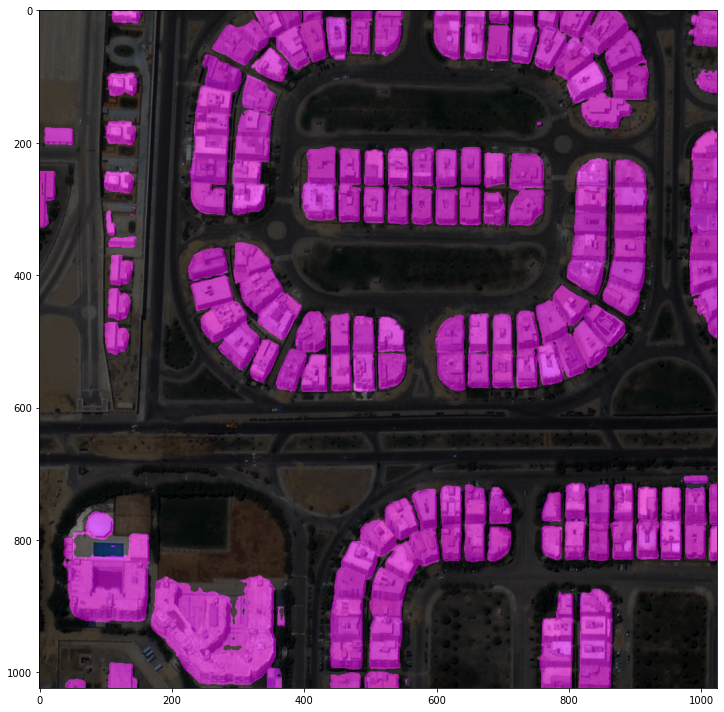

In [ ]:
model.cfg = cfg

img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/building/image/BLD00007_PS3_K3A_NIA0276.png')
result = inference_segmentor(model, img)
plt.figure(figsize=(10, 10))
show_result_pyplot(model, img, result, palette)

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


<Figure size 720x720 with 0 Axes>

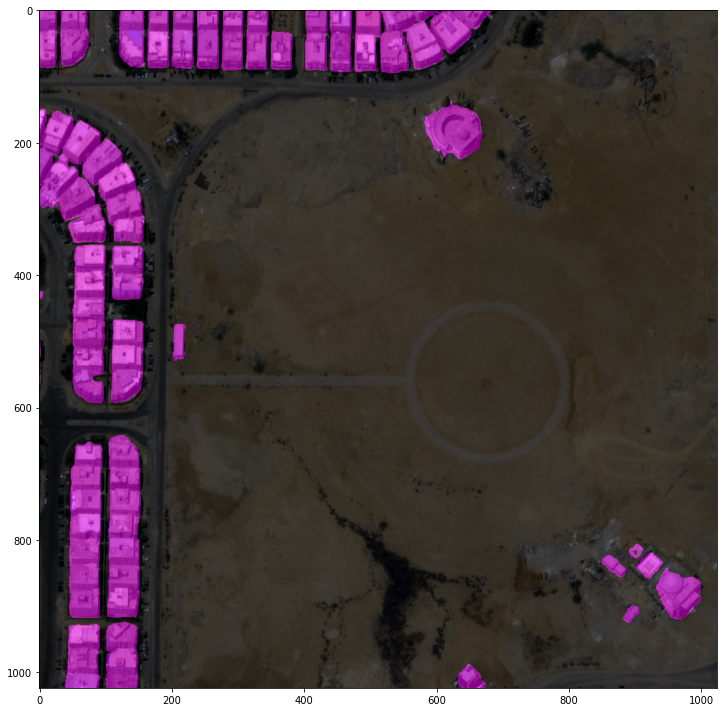

In [ ]:
img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/building/image/BLD00010_PS3_K3A_NIA0276.png')
result = inference_segmentor(model, img)
plt.figure(figsize=(10, 10))
show_result_pyplot(model, img, result, palette)

/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


<Figure size 720x720 with 0 Axes>

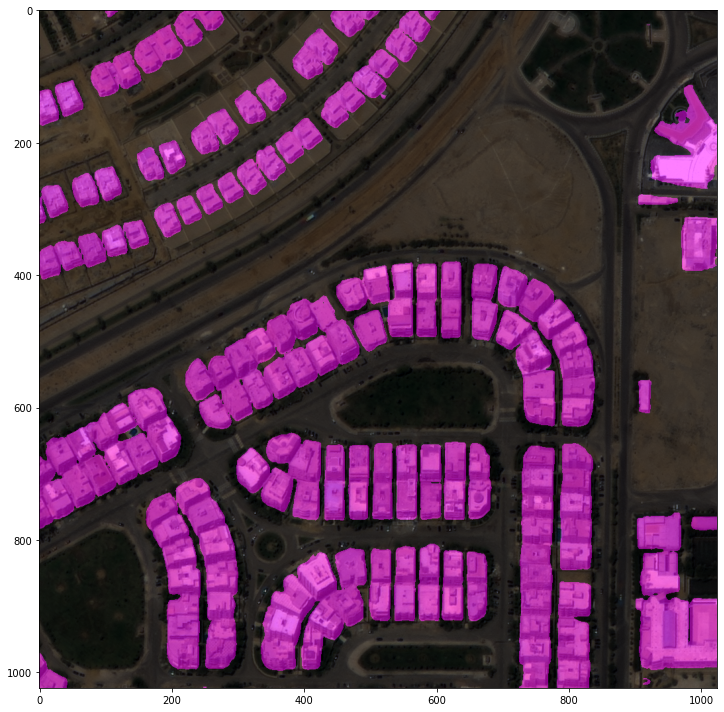

In [ ]:
img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/building/image/BLD00031_PS3_K3A_NIA0276.png')
result = inference_segmentor(model, img)
plt.figure(figsize=(10, 10))
show_result_pyplot(model, img, result, palette)

/content/mmsegmentation/mmseg/models/backbones/hrnet.py:318: UserWarning: DeprecationWarning: pretrained is deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is deprecated, '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


load checkpoint from local path: /content/drive/Shareddrives/msmg/level1/source/building/hrnet/hrnetv2p-w48/no2_iter10000_checkpoint/iter_10000.pth


/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


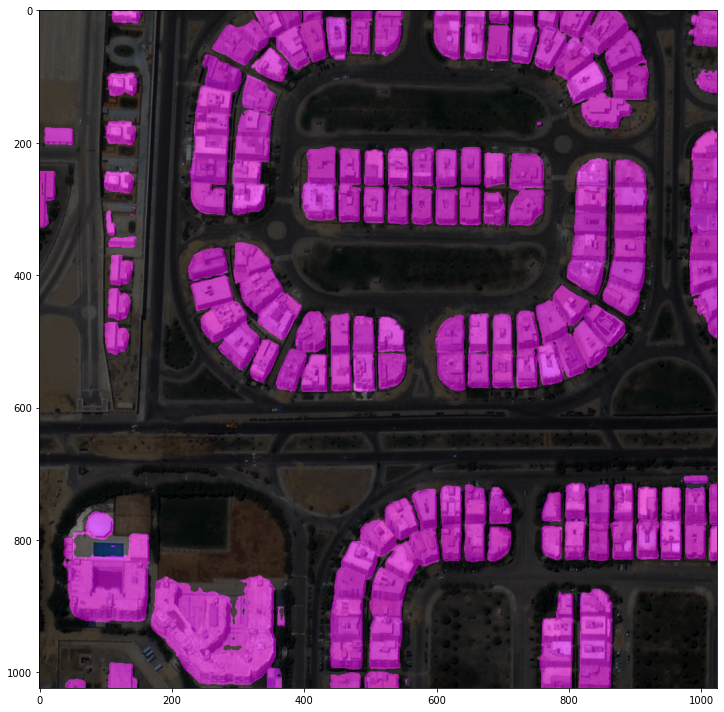

In [ ]:
checkpoint_file = '/content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/iter_10000.pth'  # 학습된 가중치 파일

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
model_ckpt = init_segmentor(cfg, checkpoint_file, device='cuda:0')  #cuda gpu 사용

img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/building/image/BLD00007_PS3_K3A_NIA0276.png') # inference할 이미지
result = inference_segmentor(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, palette)

# Inference and evaluation on the test dataset

In [ ]:
import torch, torchvision

import mmseg
from mmseg.apis import inference_segmentor, init_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
from mmseg.datasets.builder import DATASETS
from mmseg.datasets.custom import CustomDataset
from mmseg.apis import set_random_seed

import mmcv
from mmcv import Config

import matplotlib.pyplot as plt
import os.path as osp
import numpy as np
from PIL import Image

In [ ]:
# convert dataset annotation to semantic segmentation map
data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/building'
img_dir = 'image'
ann_dir = 'annotation'

# define class and plaette for better visualization
classes = ('background', 'building')
palette = [[0, 0, 0], [0, 0, 255]]

In [ ]:
config_file = '/content/mmsegmentation/configs/hrnet/fcn_hr48_512x512_160k_ade20k.py'
checkpoint_file = '/content/mmsegmentation/checkpoints/fcn_hr48_512x512_160k_ade20k_20200614_214407-a52fc02c.pth'
save_pth_path = '/content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint'

In [ ]:
@DATASETS.register_module(force=True)
class BuildingSemanticSegmentation(CustomDataset):
    CLASSES = classes
    PALETTE = palette
    def __init__(self, split, **kwargs):
        super().__init__(img_suffix='.png', seg_map_suffix='.png', split=split, **kwargs)
        assert osp.exists(self.img_dir) and self.split is not None

cfg = Config.fromfile(config_file)

from mmseg.apis import set_random_seed

# add CLASSES and PALETTE to checkpoint
cfg.checkpoint_config.meta = dict(
    CLASSES=classes,
    PALETTE=palette)

# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
#cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.backbone.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 2

# modify loss function crossentropy
cfg.model.decode_head.loss_decode= [dict(type='CrossEntropyLoss', class_weight=[0.5, 1.0], loss_name='loss_ce', loss_weight=0.8),
																		dict(type='LovaszLoss', loss_type='multi_class', classes='all', per_image=True, reduction='mean', class_weight=[0.5, 1.0], loss_name='loss_lovasz', loss_weight=0.2)]

# Modify dataset type and path
cfg.dataset_type = 'BuildingSemanticSegmentation'
cfg.data_root = data_root

cfg.data.samples_per_gpu = 8
cfg.data.workers_per_gpu = 8

# Albumentations transforms settings
albu_train_transforms = [
    dict(
    type='OneOf',
    transforms=[
        dict(type='RandomRotate90', p=1.0)
    ], p=0.5),

    dict(
    type='OneOf',
    transforms=[
        dict(type='RandomBrightnessContrast',brightness_limit=0.1, contrast_limit=0.15, p=1.0),
        dict(type='CLAHE', clip_limit=4.0, tile_grid_size=(8, 8), always_apply=False, p=1.0),
        dict(type='HueSaturationValue', hue_shift_limit=15, sat_shift_limit=25, val_shift_limit=10, p=1.0),
    ], p=0.5)
]

# pipline
cfg.img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
cfg.crop_size = (512, 512)
cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='Resize', img_scale=(1024, 1024), ratio_range=(0.5, 1.5)),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', flip_ratio=0.5),
    # dict(
    #     type='Albu',
    #     transforms=albu_train_transforms,
    #     keymap=dict(img='image', gt_semantic_seg='mask'),
    #     update_pad_shape=True,
    #     ),
    dict(type='PhotoMetricDistortion'),
    dict(type='Normalize', **cfg.img_norm_cfg),
    dict(type='Pad', size=cfg.crop_size, pad_val=0, seg_pad_val=255),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_semantic_seg']),
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=(1024, 1024),
        # img_ratios=[0.5, 0.75, 1.0, 1.25, 1.5, 1.75],
        flip=False,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(type='Normalize', **cfg.img_norm_cfg),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img']),
        ])
]

cfg.data.train.type = cfg.dataset_type
cfg.data.train.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/train/building/'
cfg.data.train.img_dir = 'image'
cfg.data.train.ann_dir = 'annotation'
cfg.data.train.pipeline = cfg.train_pipeline
cfg.data.train.split = 'split/train.txt'

cfg.data.val.type = cfg.dataset_type
cfg.data.val.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/validation/building/'
cfg.data.val.img_dir = 'image'
cfg.data.val.ann_dir = 'annotation'
cfg.data.val.pipeline = cfg.test_pipeline
cfg.data.val.split = 'split/validation.txt'

cfg.data.test.type = cfg.dataset_type
cfg.data.test.data_root = '/content/drive/Shareddrives/msmg/level1/dataset/validation/building/'
cfg.data.test.img_dir = 'image'
cfg.data.test.ann_dir = 'annotation'
cfg.data.test.pipeline = cfg.test_pipeline
cfg.data.test.split = 'split/validation.txt'

# We can still use the pre-trained Mask RCNN model though we do not need to
# use the mask branch
cfg.load_from = checkpoint_file

# Set up working dir to save files and logs.
cfg.work_dir = save_pth_path

cfg.runner.max_iters = 10000
cfg.log_config.interval = 10
cfg.evaluation.interval = 100
cfg.evaluation.save_best = 'mIoU'
cfg.checkpoint_config.interval = 2000

# Set seed to facitate reproducing the result
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# We can also use tensorboard to log the training process
cfg.log_config.hooks = [
    dict(type='TextLoggerHook'),
    dict(type='TensorboardLoggerHook')]

# Let's have a look at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='BN', requires_grad=True)
model = dict(
    type='EncoderDecoder',
    pretrained='open-mmlab://msra/hrnetv2_w48',
    backbone=dict(
        type='HRNet',
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=False,
        extra=dict(
            stage1=dict(
                num_modules=1,
                num_branches=1,
                block='BOTTLENECK',
                num_blocks=(4, ),
                num_channels=(64, )),
            stage2=dict(
                num_modules=1,
                num_branches=2,
                block='BASIC',
                num_blocks=(4, 4),
                num_channels=(48, 96)),
            stage3=dict(
                num_modules=4,
                num_branches=3,
                block='BASIC',
                num_blocks=(4, 4, 4),
                num_channels=(48, 96, 192)),
            stage4=dict(
                num_modules=3,
                num_branches=4,
                block='BASIC',
     

/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:236: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  'Default ``avg_non_ignore`` is False, if you would like to '


load checkpoint from local path: /content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_9300.pth


/content/mmsegmentation/mmseg/models/segmentors/base.py:289: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


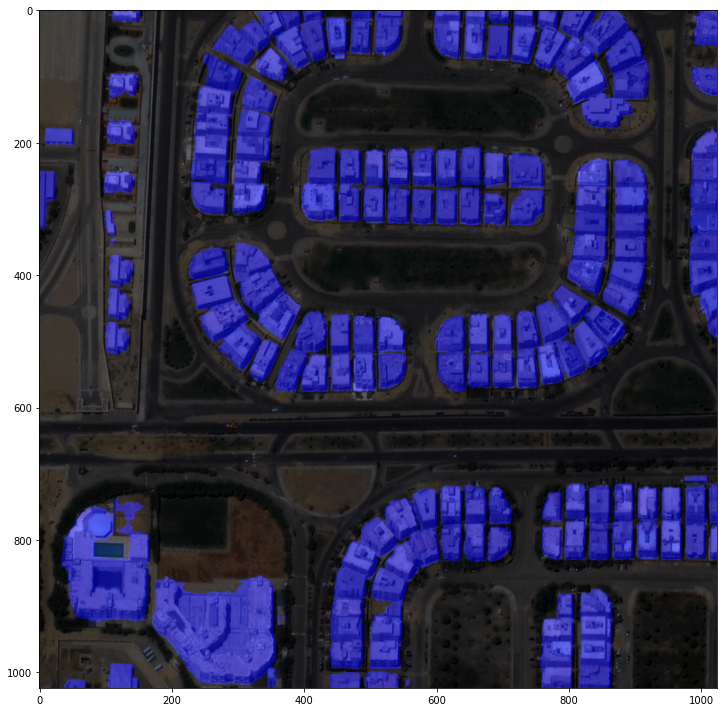

In [ ]:
checkpoint_file = '/content/drive/Shareddrives/msmg/loss test/bjh/building_hrnet_no4_iter10000_checkpoint/best_mIoU_iter_9300.pth'  # 학습된 가중치 파일

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용. 
model_ckpt = init_segmentor(cfg, checkpoint_file, device='cuda:0')  #cuda gpu 사용

img = mmcv.imread('/content/drive/Shareddrives/msmg/level1/dataset/validation/building/image/BLD00007_PS3_K3A_NIA0276.png') # inference할 이미지
result = inference_segmentor(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, palette)

In [ ]:
from mmseg.datasets import (build_dataloader, build_dataset)

# test용 Dataset과 DataLoader 생성. 
# build_dataset()호출 시 list로 감싸지 않는 것이 train용 dataset 생성시와 차이. 
dataset = build_dataset(cfg.data.test)
data_loader = build_dataloader(
        dataset,
        # 반드시 아래 samples_per_gpu 인자값은 1로 설정
        #samples_per_gpu=cfg.data.samples_per_gpu,
        #workers_per_gpu=cfg.data.workers_per_gpu,
        samples_per_gpu=1,
        workers_per_gpu=1,
        dist=False,
        shuffle=False)

2022-06-02 07:30:36,205 - mmseg - INFO - Loaded 159 images


In [ ]:
from mmseg.apis import multi_gpu_test, single_gpu_test
from mmcv.parallel import MMDataParallel, MMDistributedDataParallel
#from mmseg.apis import inference_detector, init_detector, show_result_pyplot

model_ckpt = MMDataParallel(model_ckpt, device_ids=[0])

In [ ]:
# single_gpu_test() 를 호출하여 test데이터 세트의 interence 수행. 반드시 batch size는 1이 되어야 함. 
# 위에서 만든 /content/show_test_output 디렉토리에 interence 결과가 시각화된 이미지가 저장됨. 
outputs = single_gpu_test(model_ckpt, data_loader, False, '/content/drive/Shareddrives/msmg/loss test/inference/building/no4', 0.9)

[                                                  ] 0/159, elapsed: 0s, ETA:

/content/mmsegmentation/mmseg/apis/test.py:69: UserWarning: DeprecationWarning: ``efficient_test`` will be deprecated, the evaluation is CPU memory friendly with pre_eval=True
  'DeprecationWarning: ``efficient_test`` will be deprecated, the '


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 159/159, 2.2 task/s, elapsed: 73s, ETA:     0s

In [ ]:
metric = dataset.evaluate(outputs, metric='mIoU')
print(metric)

per class results:

+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
| background | 93.59 |  96.2 |
|  building  | 83.48 | 92.26 |
+------------+-------+-------+
Summary:

+-------+-------+-------+
|  aAcc |  mIoU |  mAcc |
+-------+-------+-------+
| 95.16 | 88.54 | 94.23 |
+-------+-------+-------+
{'aAcc': 0.9516, 'mIoU': 0.8854000000000001, 'mAcc': 0.9423, 'IoU.background': 0.9359000000000001, 'IoU.building': 0.8348, 'Acc.background': 0.9620000000000001, 'Acc.building': 0.9226000000000001}
